# Here, we have simulated the Potential Barrier and guassian wave packet, using single and double potential barriers

@author - Devashish and Darsh

In [2]:
import numpy as np
import scipy
from scipy import sparse
from scipy.sparse import diags, linalg
import matplotlib.pyplot as plt
import scipy.sparse.linalg as splin
plt.style.use('seaborn')

from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import moviepy

In [3]:
J = 2048
xmin, xmax      =   -10. , 10.          # x domain
t0  , tend      =    0 , 1.0            # time period
x0  , k0, sig   =    -5. ,   10. , 1.0  # parameters for the gaussian
dt              =    0.001              # time step
V0              =   50                 # Set the strength of the potential here
q               =   2*k0
m = 0.5


x, dx  = np.linspace(xmin,xmax,J+1,retstep=True) # x-array and x step
t      = np.arange(t0, tend+dt, dt)              # t-array
N      = len(t)

In [4]:
#Defining the Step Potential

def Step(x, right = True):                                        #heaviside theta function
    if right == True:
        step = 1 * (x>0)
        return step
    else:
        step = 1 * (x<0)
        return step


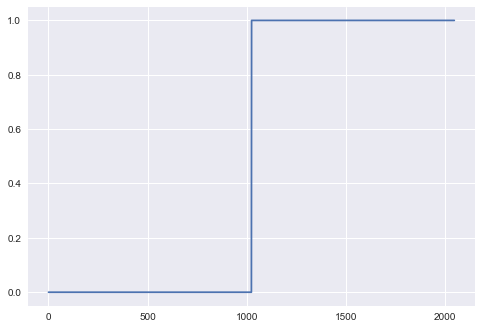

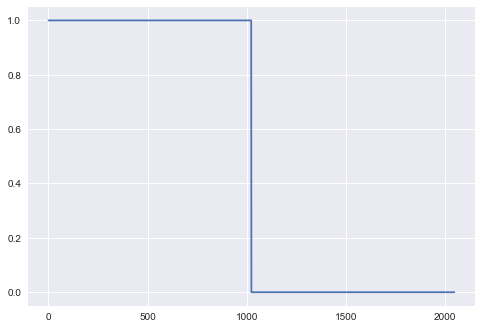

In [5]:
plt.plot(Step(x))
plt.show()                                       #Right Step Potential
plt.plot(Step(x, right = False))
plt.show()                                       #Left Step  Potential

# Single Barrier Potential

In [6]:
#defining Potential Barrier

def Potential_Barrier(V0 , x ,position , length):                                       
    A = position - length/2
    B = position + length/2
    step = (Step(x-A)==Step(x-B,right = False))
    step = step*1
    V     = V0*step
    return V

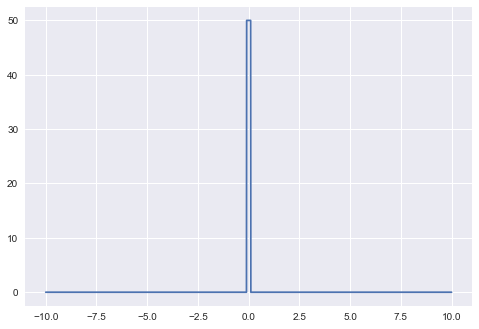

In [7]:
V  = Potential_Barrier(V0,x,0.,0.2)    

plt.plot(x, V)

In [8]:
from Modules import others
from Modules.others import Gaussian_Function

In [9]:
psi0   = Gaussian_Function(x,x0,k0,sig)                             

In [10]:
#Solving it using the Crank Nikolson method, without ABCs

In [37]:
from Modules import CrankNikolson
from Modules.CrankNikolson import CrankNikolson, Solve_CN

U1, U2 = CrankNikolson(J, V[0:2048], dx, dt, m)
PSI = Solve_CN(x,dx,t,dt,psi0,V, m)

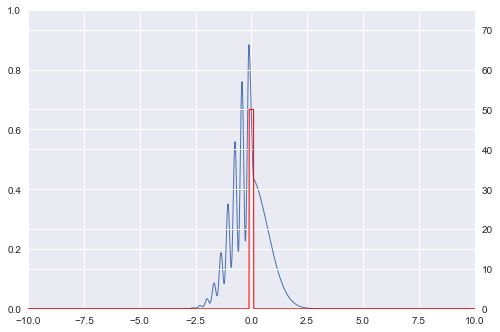

In [12]:
fig, (ax1) = plt.subplots(1, sharex=True, sharey=True)

ax1t= ax1.twinx()
ax1t.get_shared_y_axes().join(ax1t)
ax1.set_ylim(0.,1.0)
ax1.set_xlim(-10.,10.)
ax1t.set_ylim(0.,1.5*V0)

ax1.plot(x,abs(PSI[:,250])**2,lw=1.0)
ax1t.plot(x,V,color='r',lw=1.0)

plt.show()

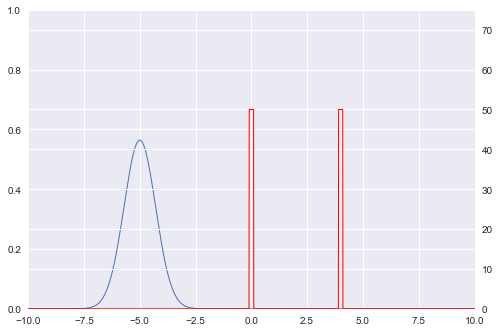

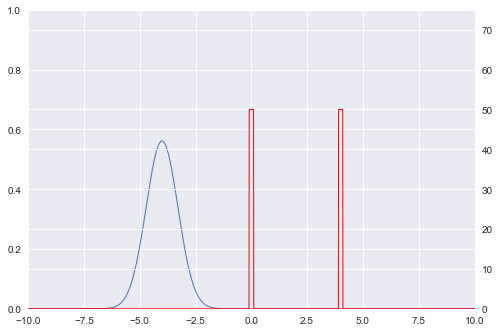

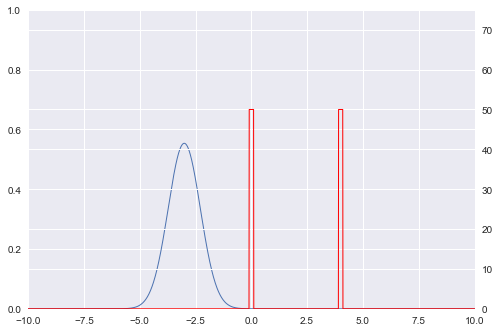

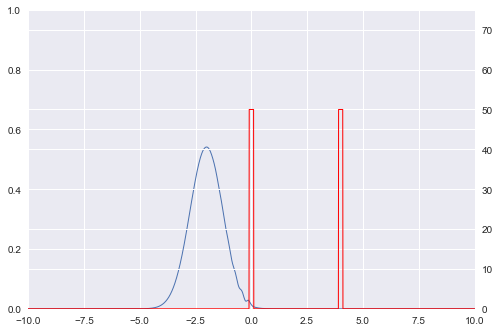

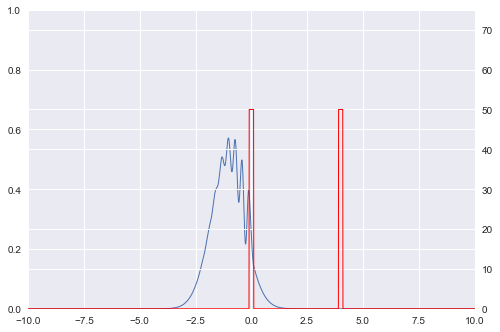

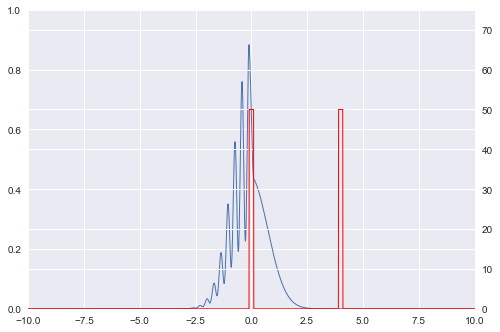

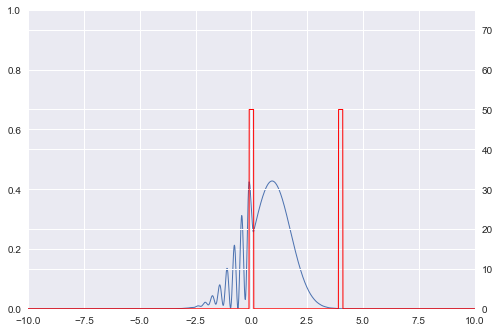

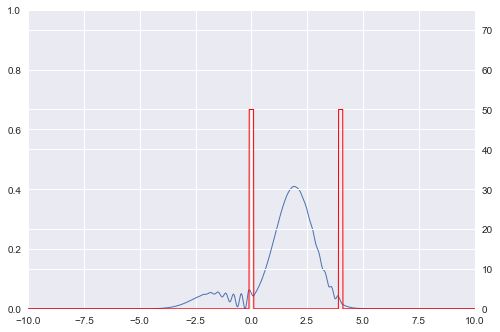

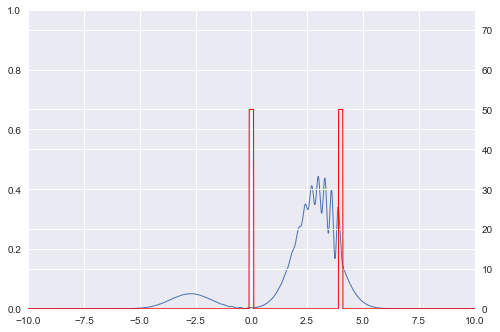

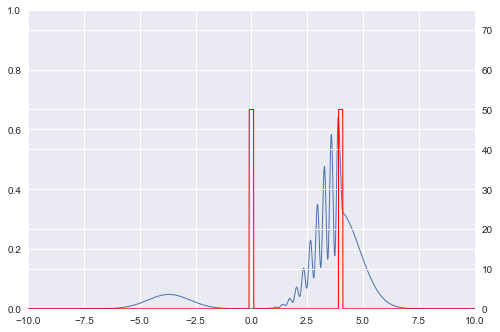

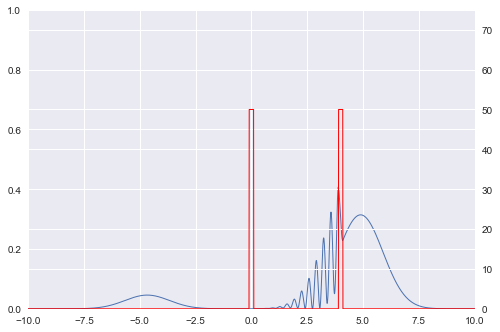

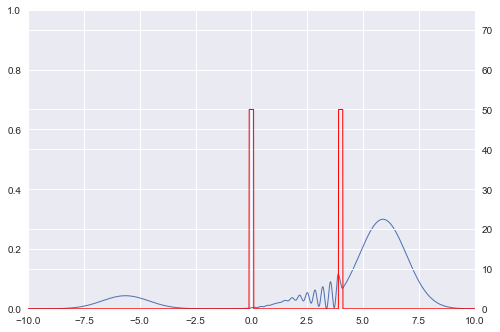

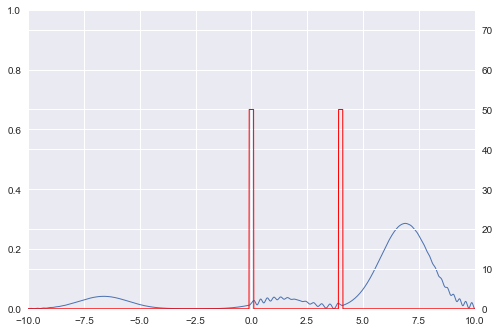

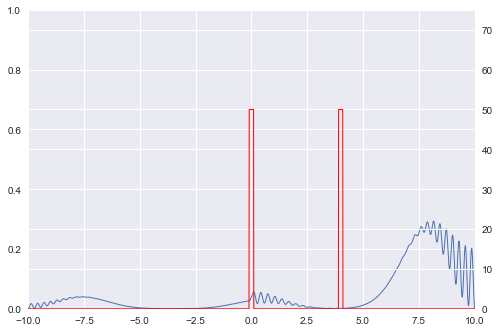

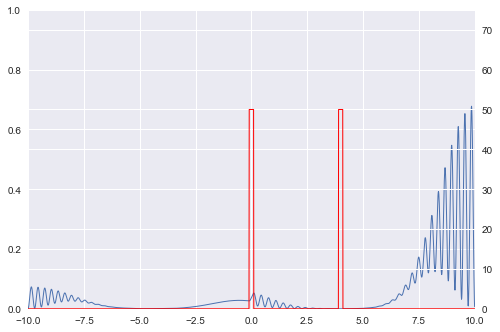

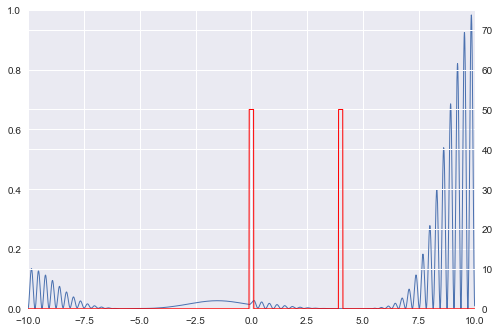

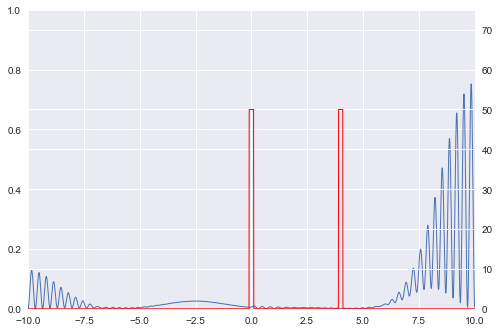

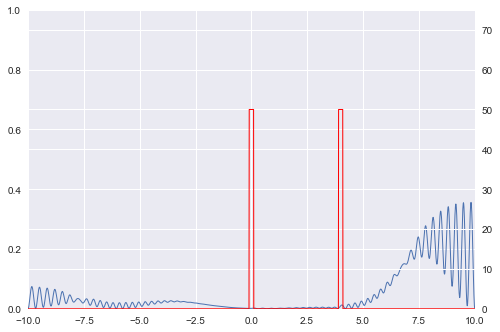

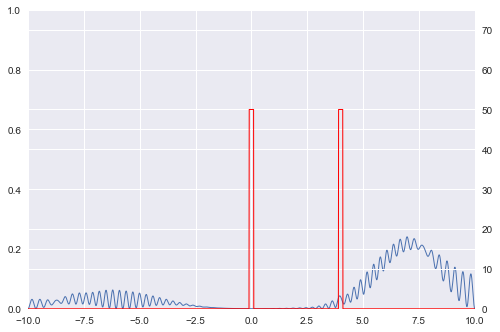

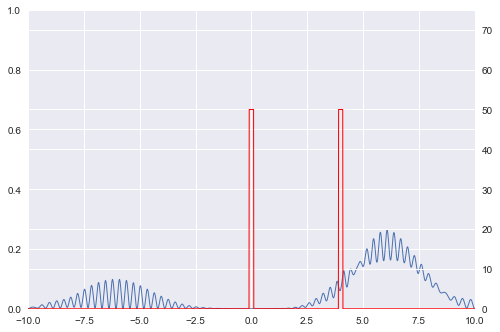

In [38]:
for i in range(0, 1000, 50):
    fig, (ax1) = plt.subplots(1, sharex=True, sharey=True)

    ax1t= ax1.twinx()
    ax1t.get_shared_y_axes().join(ax1t)
    ax1.set_ylim(0.,1.0)
    ax1.set_xlim(-10.,10.)
    ax1t.set_ylim(0.,1.5*V0)

    ax1.plot(x,abs(PSI[:,i])**2,lw=1.0)
    
    ax1t.plot(x,V,color='r',lw=1.0)


    plt.show()


In [14]:
#Here also, there is a Reflection, so we wiull use different methods, that we have geenralized to avoid this reflection

In [15]:
#Using p = 3 method

In [16]:
from Modules import P3_ABC
from Modules.P3_ABC import CN_P3, P3_ZETA, p3_Solve_CN

In [17]:
p3_zeta = P3_ZETA(q, q, q, V[0:2048], dt, dx, m)
p3_u1, p3_u2 = CN_P3(J, V[0:2048], p3_zeta, dt, dx, m)
p3_psi = p3_Solve_CN(x, dx, t, dt, psi0, V, m, p3_zeta)

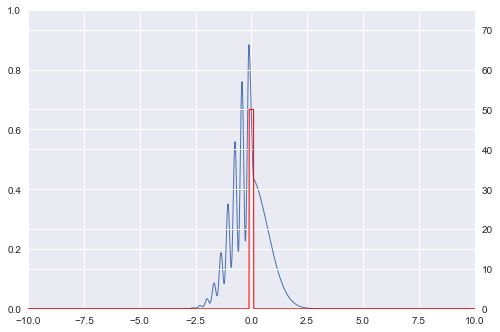

In [18]:
fig, (ax1) = plt.subplots(1, sharex=True, sharey=True)

ax1t= ax1.twinx()
ax1t.get_shared_y_axes().join(ax1t)
ax1.set_ylim(0.,1.0)
ax1.set_xlim(-10.,10.)
ax1t.set_ylim(0.,1.5*V0)

ax1.plot(x,abs(p3_psi[:,250])**2,lw=1.0)
ax1t.plot(x,V,color='r',lw=1.0)

plt.show()

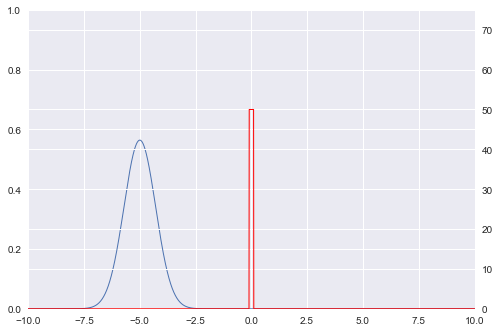

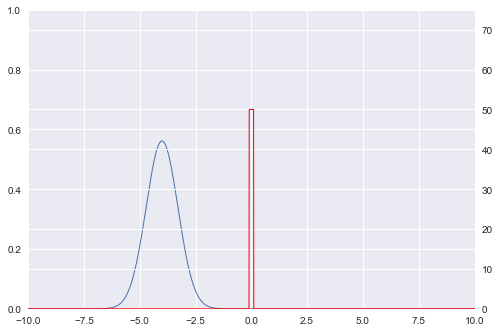

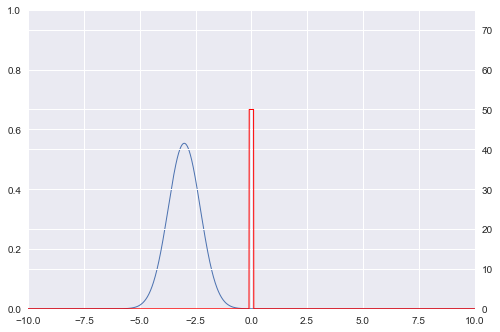

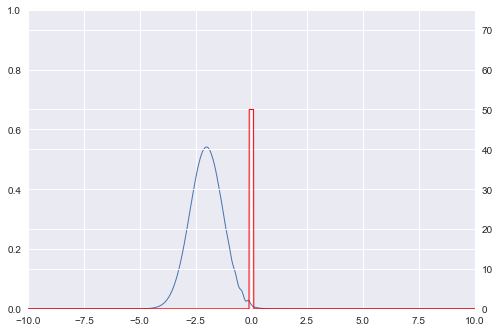

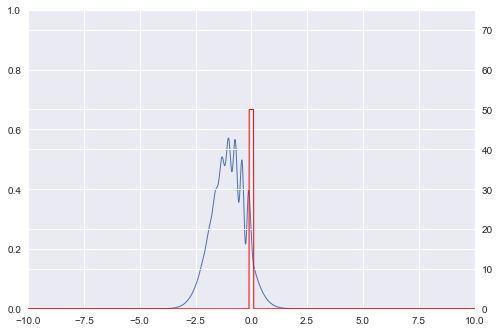

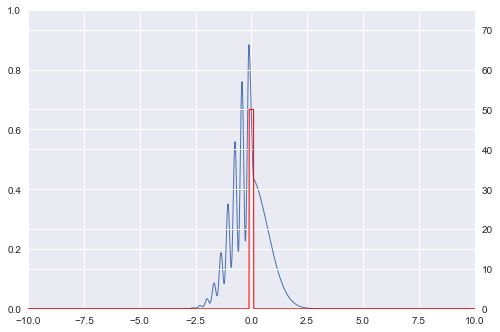

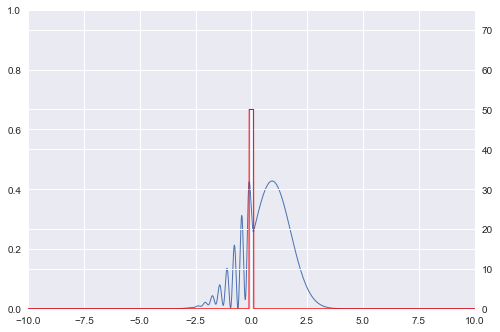

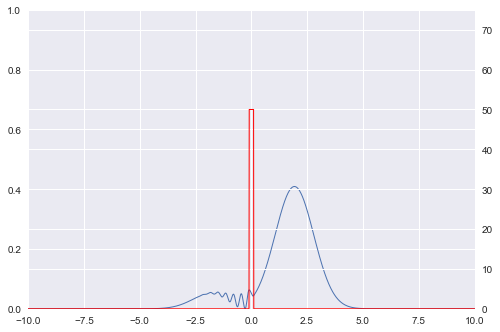

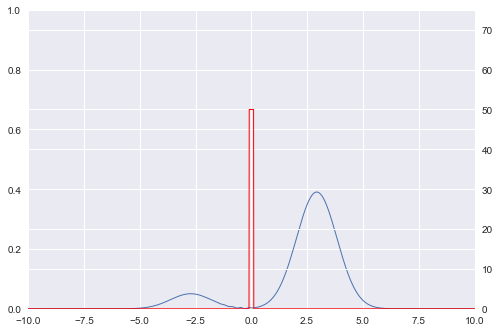

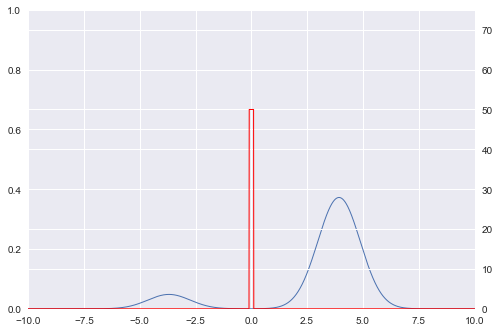

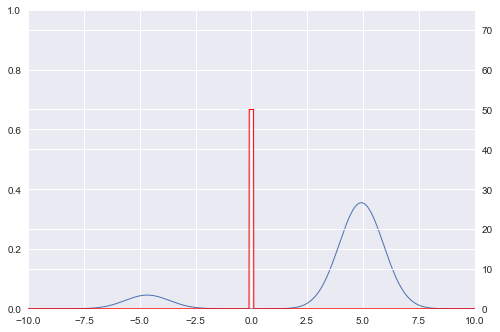

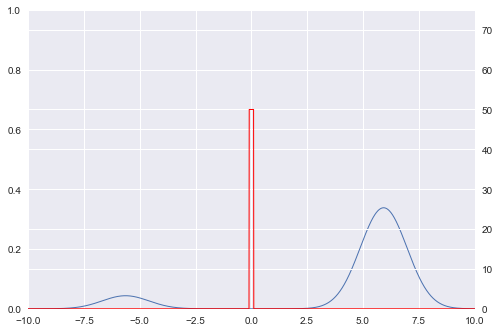

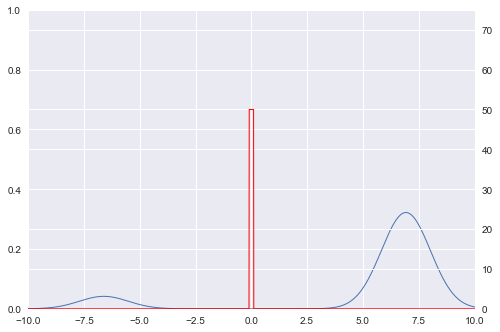

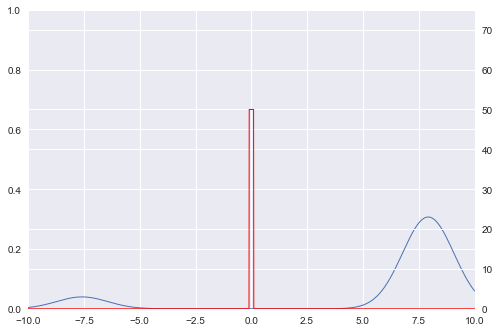

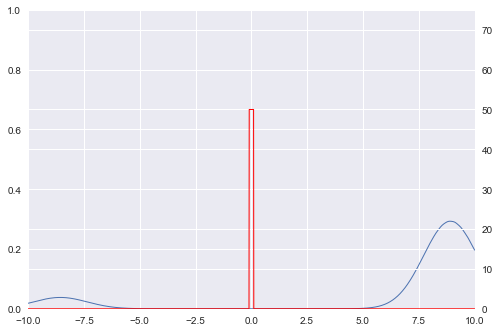

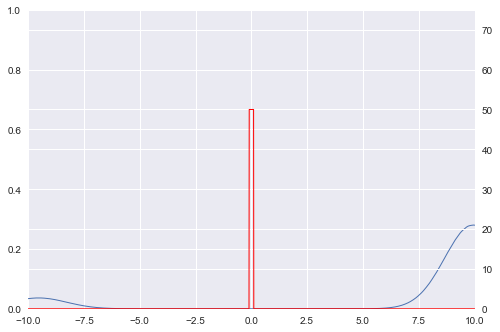

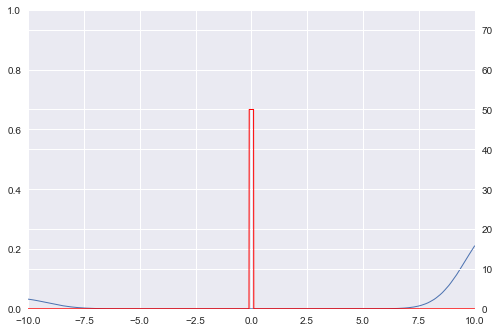

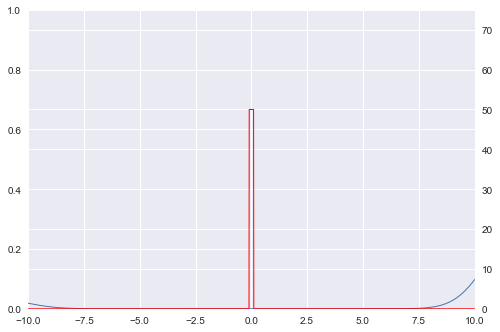

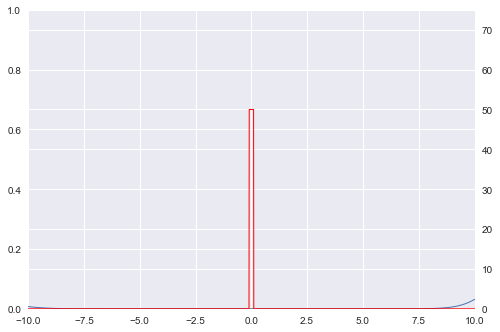

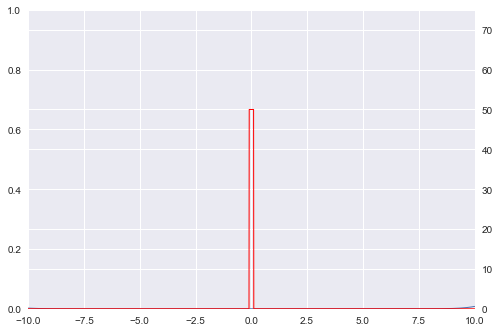

In [19]:
for i in range(0, 1000, 50):
    fig, (ax1) = plt.subplots(1, sharex=True, sharey=True)

    ax1t= ax1.twinx()
    ax1t.get_shared_y_axes().join(ax1t)
    ax1.set_ylim(0.,1.0)
    ax1.set_xlim(-10.,10.)
    ax1t.set_ylim(0.,1.5*V0)
    timer = ax1.text(-9.7, 0.92, '')
    norm  = ax1.text(-9.7, 0.89, '')

    ax1.plot(x,abs(p3_psi[:,i])**2,lw=1.0)
    
    ax1t.plot(x,V,color='r',lw=1.0)

    plt.show()


In [20]:
#using LAM method

In [21]:
from Modules import LAM
from Modules.LAM import LAM_ABC, CN_LAM, LAM_CN_Solve

In [22]:
alpha1 = 37                          #Changing the alpha1 and alpha2, in some ratio, 
                                     #changes the nature of absorbing boundary conditions heavily                 
alpha2 = 39


g1 = (np.sqrt(2*m*alpha2) - np.sqrt(2*m*alpha1))/(alpha2 - alpha1)              #The parameters are defined in our report
g2 = (alpha2*np.sqrt(2*m*alpha1) - alpha1*np.sqrt(2*m*alpha2))/(alpha2 - alpha1)

In [23]:
lam_zeta = LAM_ABC(g1, g2, V[0:2048],dt,dx,m, k0)
lam_U1, LAM_U2 = CN_LAM(J, V[0:2048], lam_zeta, dx, dt, m)
lam_psi = LAM_CN_Solve(g1, g2, x, dx, t, dt, psi0, V, m, k0)

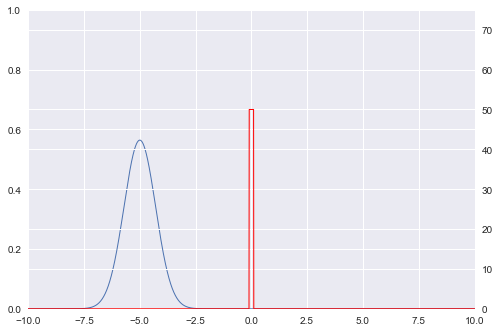

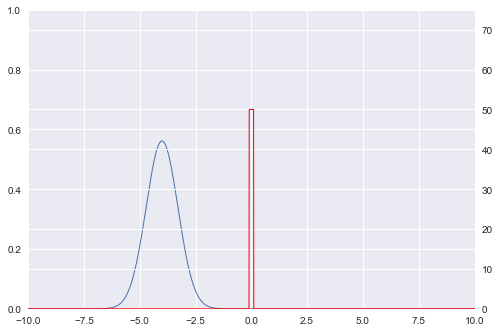

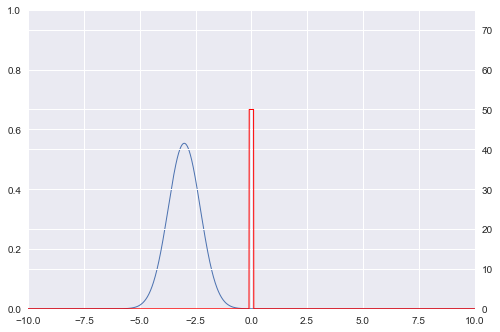

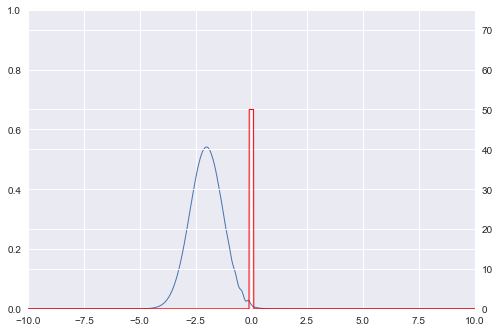

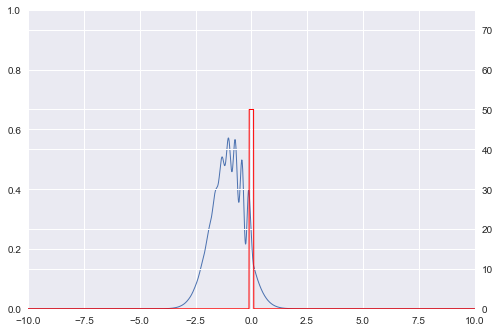

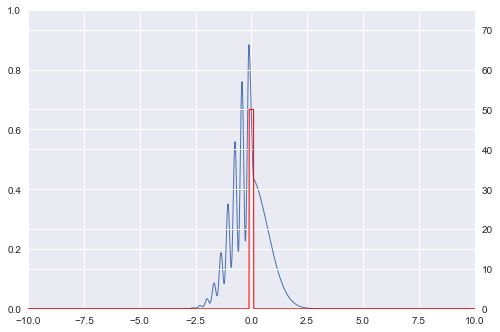

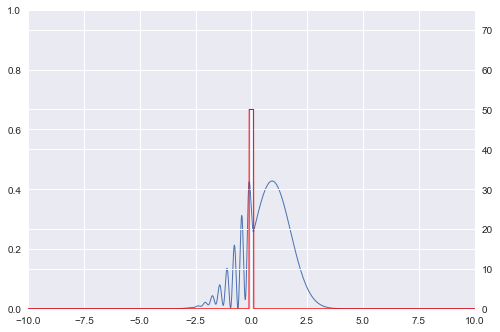

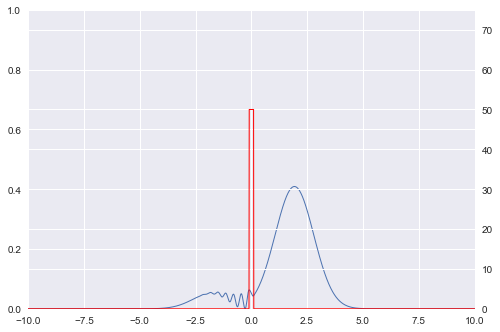

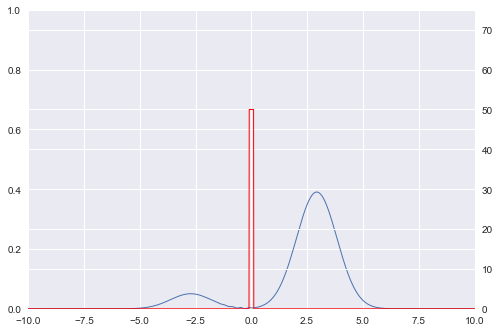

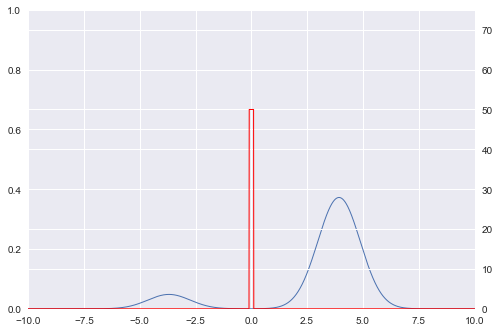

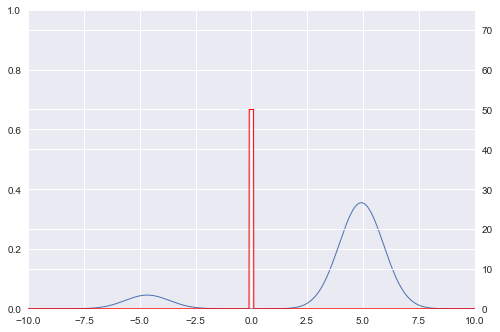

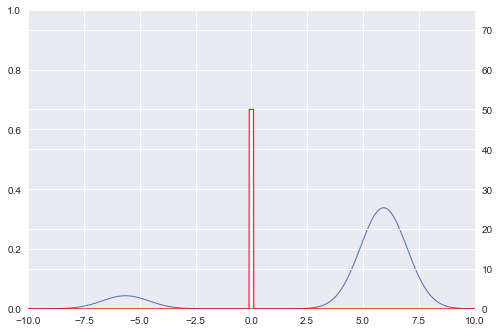

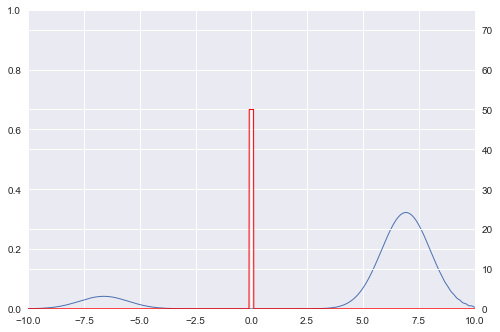

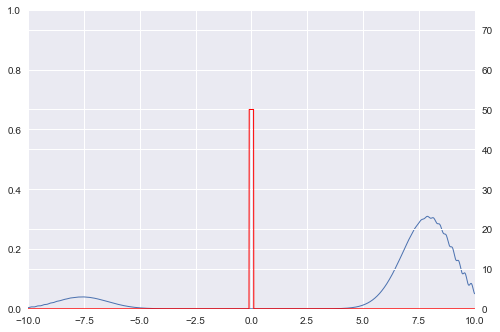

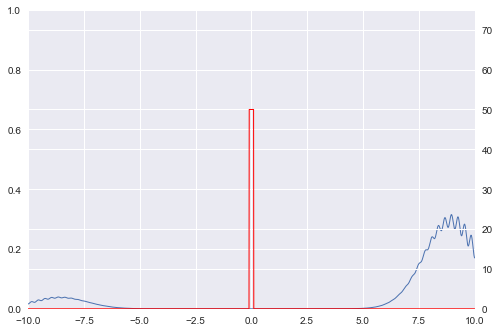

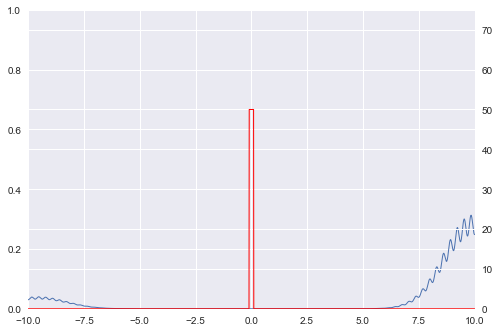

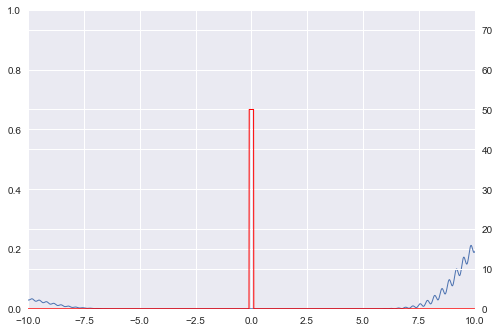

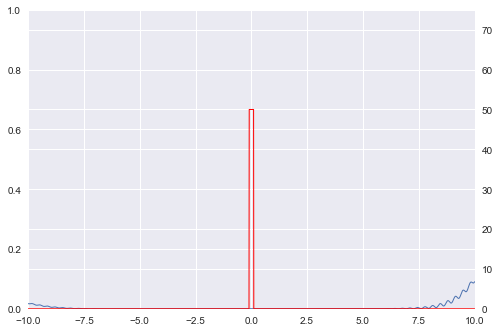

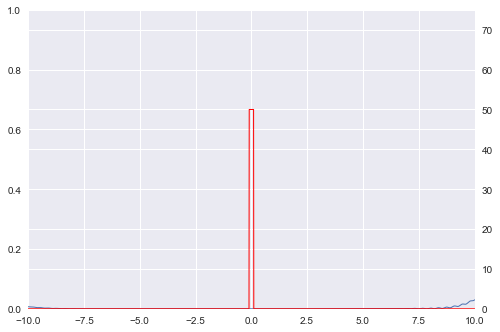

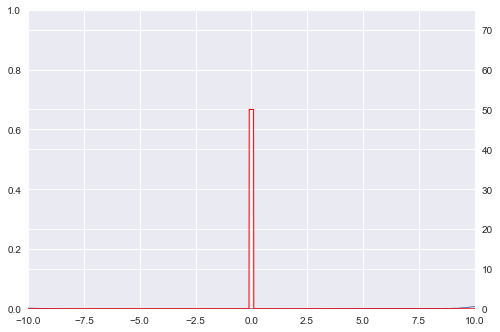

In [24]:
for i in range(0, 1000, 50):
    fig, (ax1) = plt.subplots(1, sharex=True, sharey=True)

    ax1t= ax1.twinx()
    ax1t.get_shared_y_axes().join(ax1t)
    ax1.set_ylim(0.,1.0)
    ax1.set_xlim(-10.,10.)
    ax1t.set_ylim(0.,1.5*V0)

    ax1.plot(x,abs(lam_psi[:,i])**2,lw=1.0)
    
    ax1t.plot(x,V,color='r',lw=1.0)

    plt.show()


In [25]:
#using RFA method

In [26]:
from Modules import RFA
from  Modules.RFA import RFA_ABC, CN_RFA, RFA_CN_Solve

In [27]:
rfa_zeta = RFA_ABC(V[0:2048], dt, dx, m, k0)
rfa_u1, rfa_u2 = CN_RFA(J, V[0:2048], rfa_zeta, dx, dt, m)
rfa_psi =RFA_CN_Solve(x, dx, t, dt, psi0, V, m, k0)

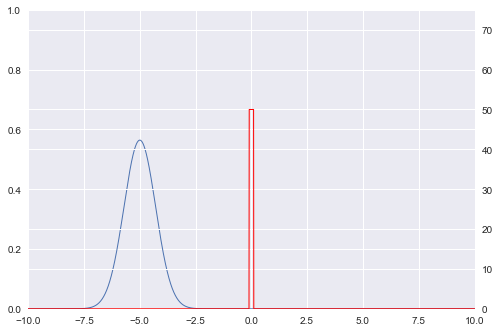

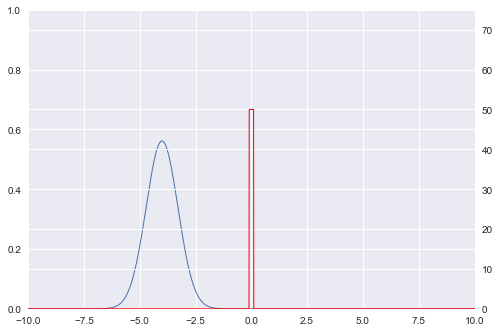

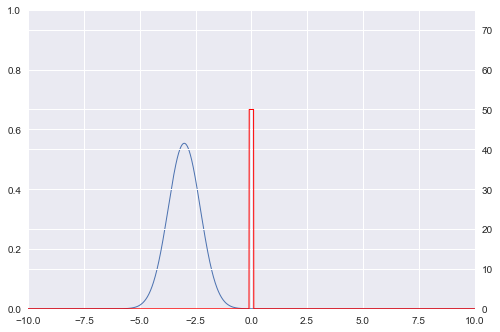

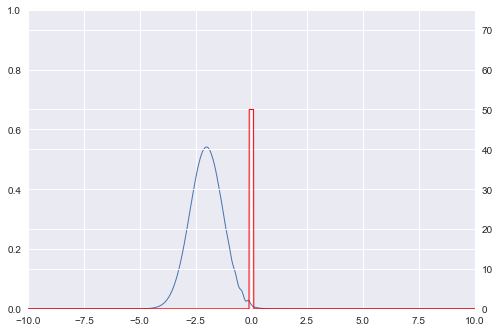

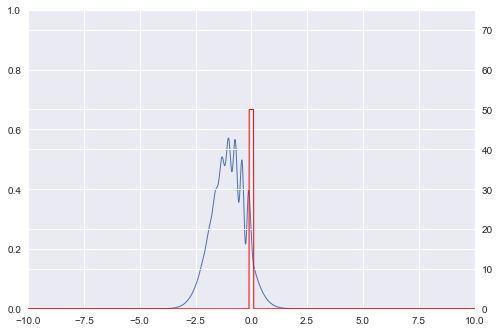

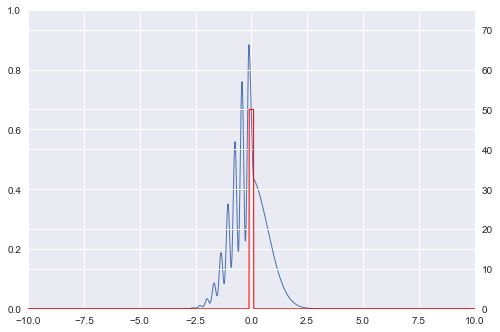

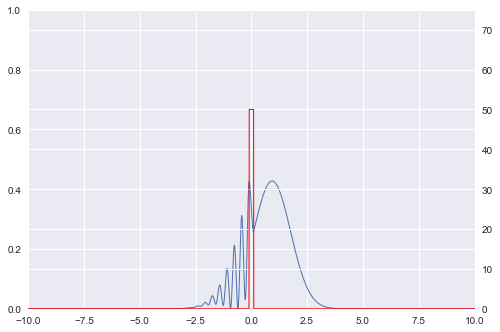

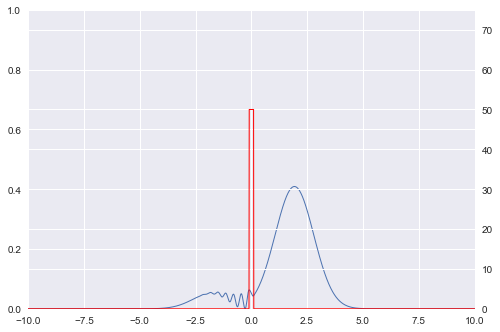

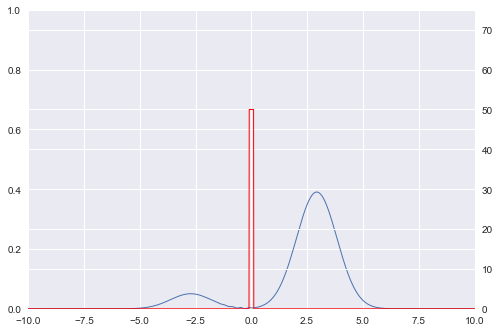

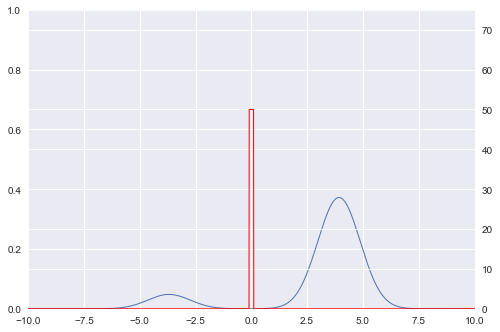

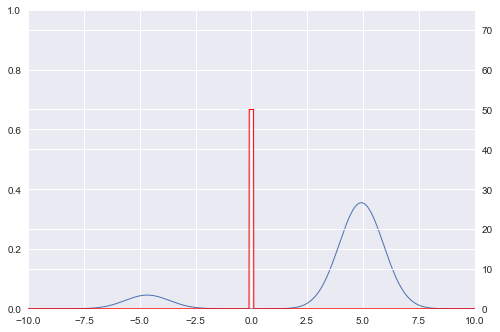

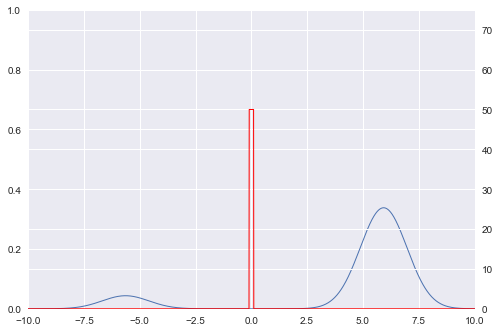

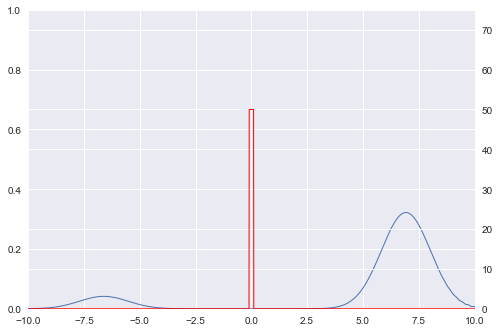

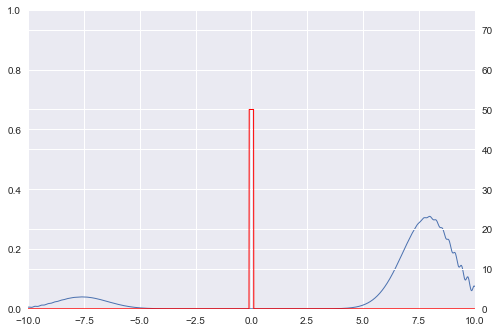

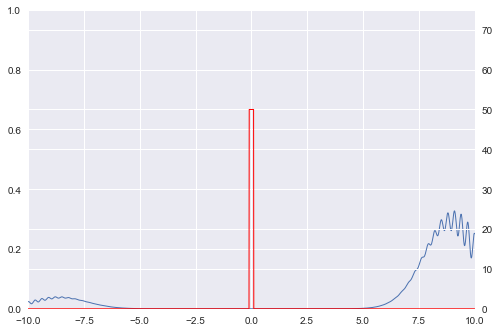

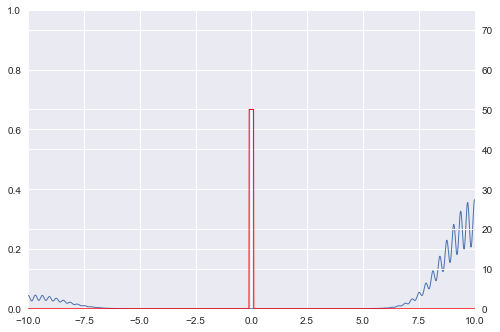

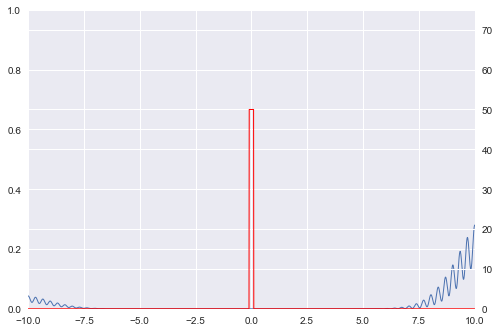

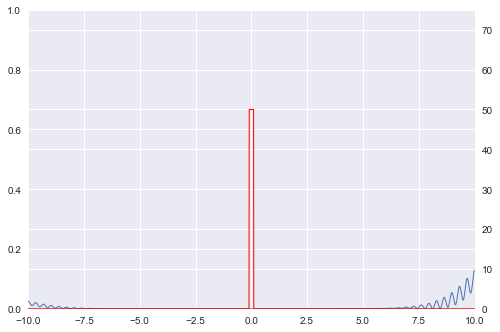

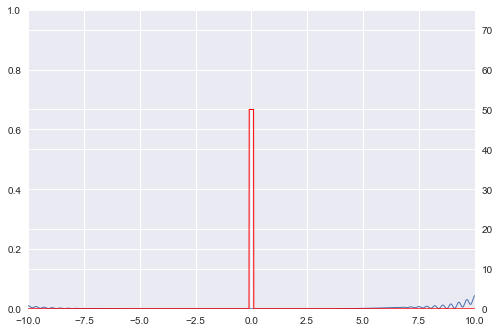

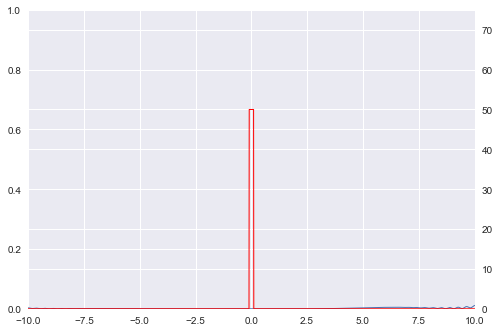

In [28]:
for i in range(0, 1000, 50):
    fig, (ax1) = plt.subplots(1, sharex=True, sharey=True)

    ax1t= ax1.twinx()
    ax1t.get_shared_y_axes().join(ax1t)
    ax1.set_ylim(0.,1.0)
    ax1.set_xlim(-10.,10.)
    ax1t.set_ylim(0.,1.5*V0)

    ax1.plot(x,abs(rfa_psi[:,i])**2,lw=1.0)
    
    ax1t.plot(x,V,color='r',lw=1.0)

    plt.show()


# Double Barrier Potential

In [46]:
def Potential_DoubleBarrier(V01,V02, x, position, distance, width1, width2):
    V1   = Potential_Barrier(V01, x, position, width1)
    V2   = Potential_Barrier(V02, x, position + distance,width2)
    V    = V1 + V2
    return V

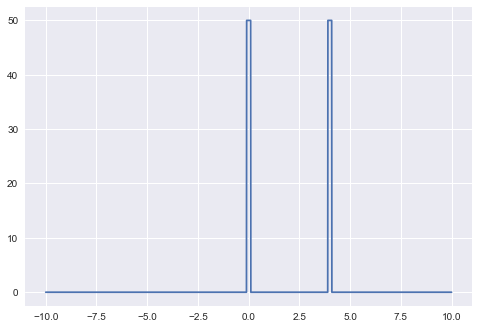

In [47]:
V = Potential_DoubleBarrier(V0, V0, x, 0.,4, 0.2, 0.2)    

plt.plot(x, V)

In [48]:
#for p = 3

In [49]:
from Modules import P3_ABC
from Modules.P3_ABC import CN_P3, P3_ZETA, p3_Solve_CN

In [50]:
p3_zeta = P3_ZETA(q, q, q, V[0:2048], dt, dx, m)
p3_u1, p3_u2 = CN_P3(J, V[0:2048], p3_zeta, dt, dx, m)
p3_psi = p3_Solve_CN(x, dx, t, dt, psi0, V, m, p3_zeta)

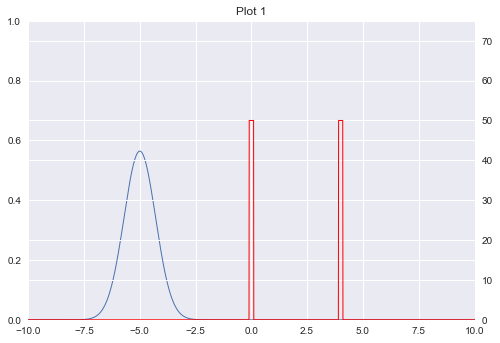

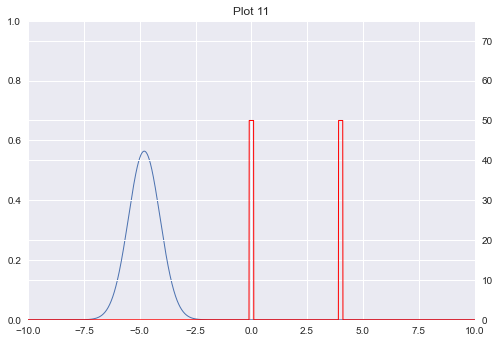

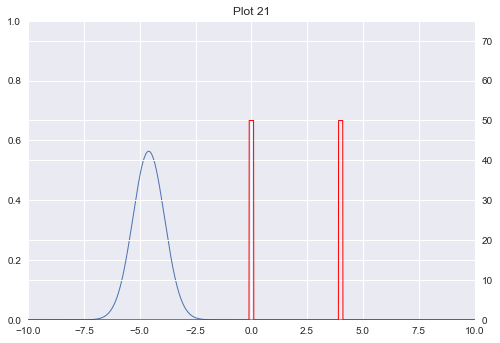

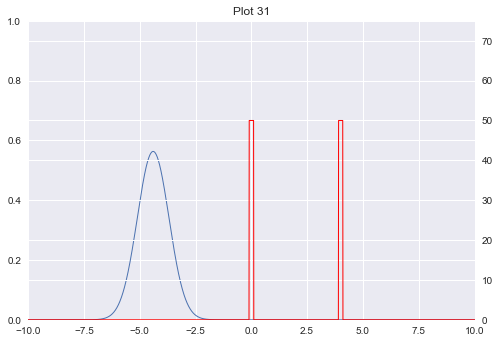

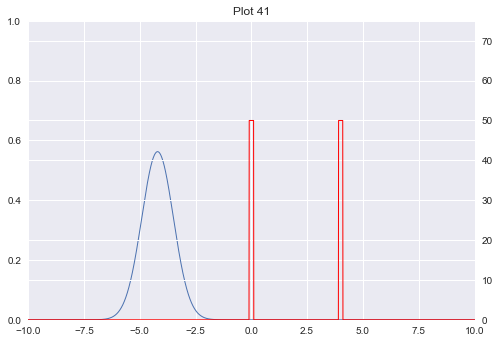

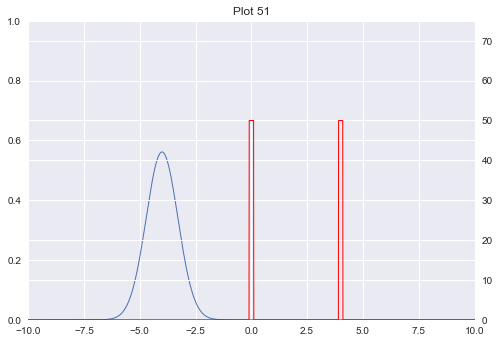

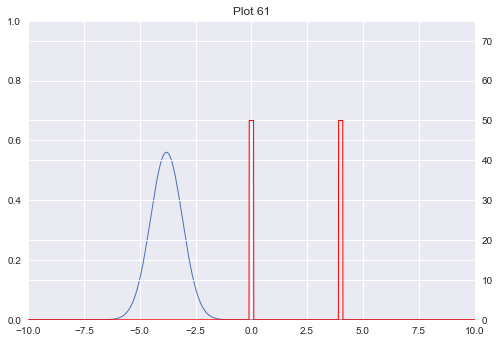

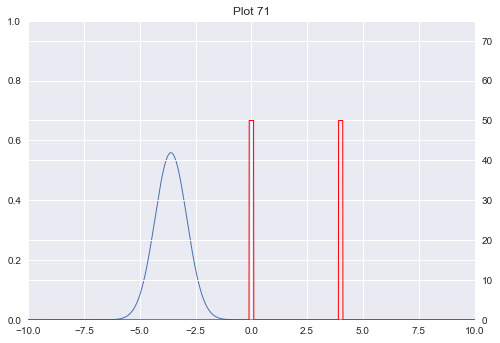

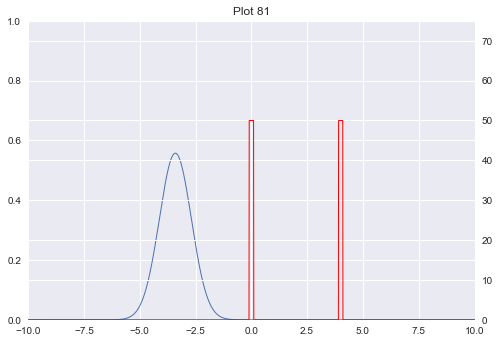

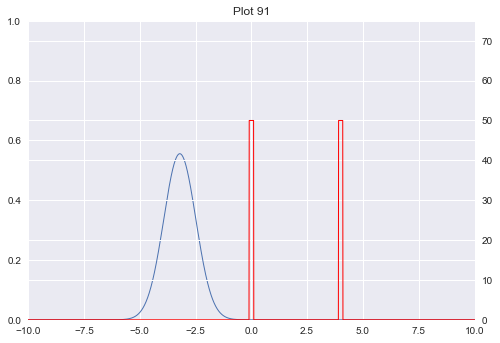

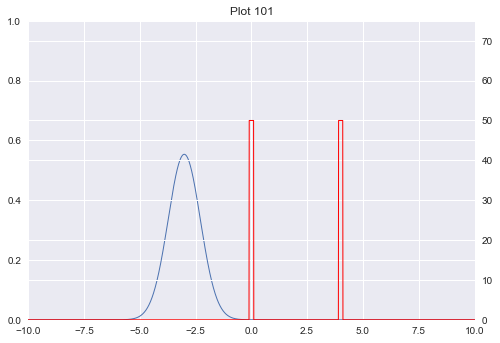

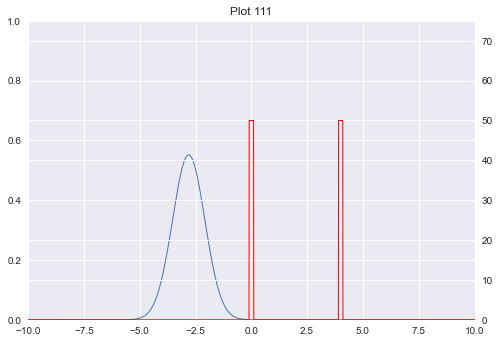

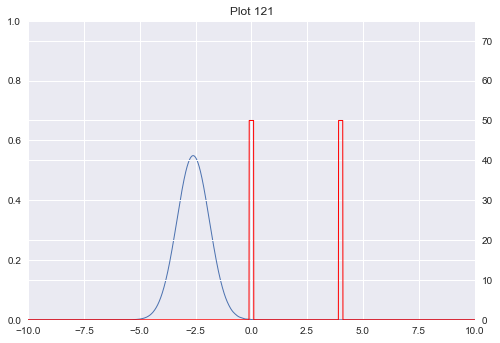

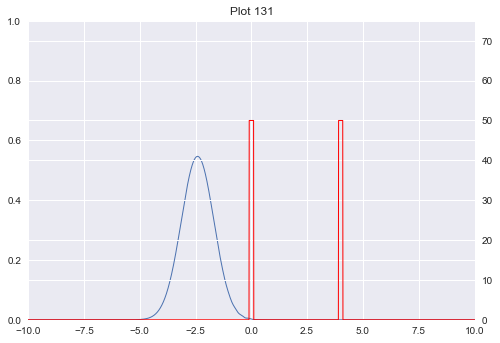

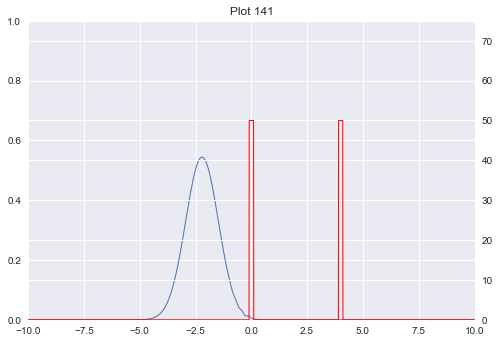

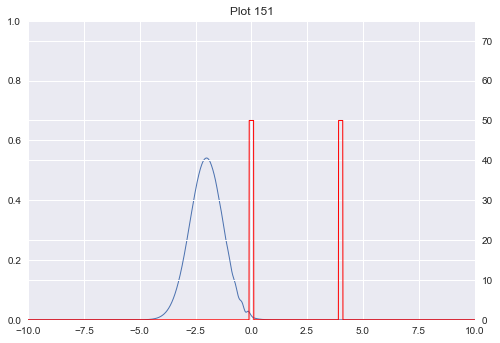

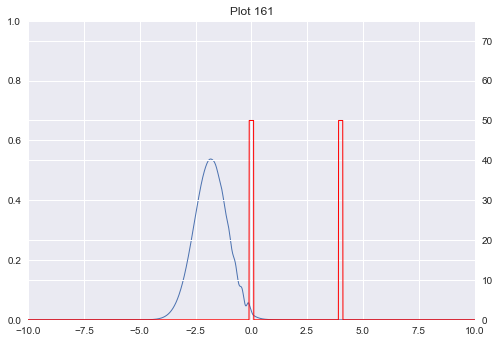

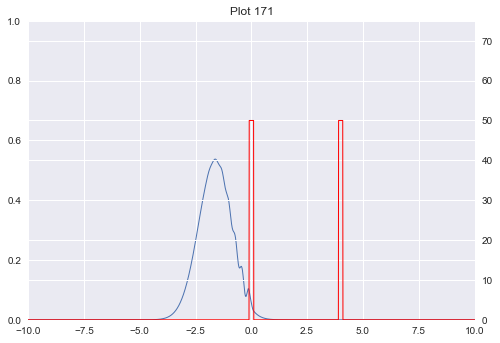

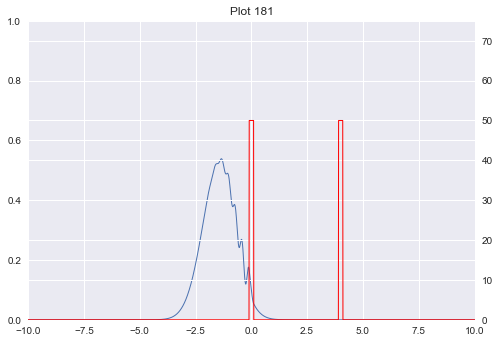

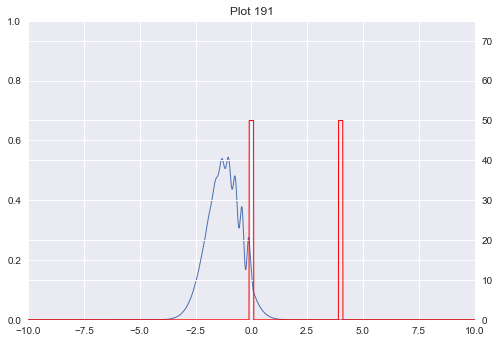

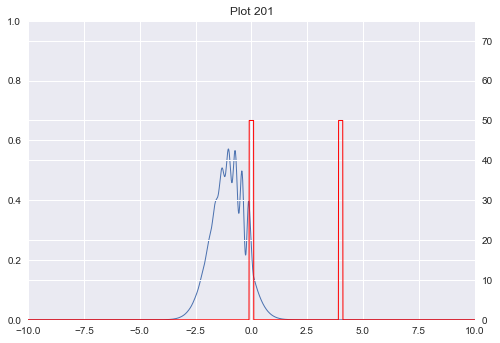

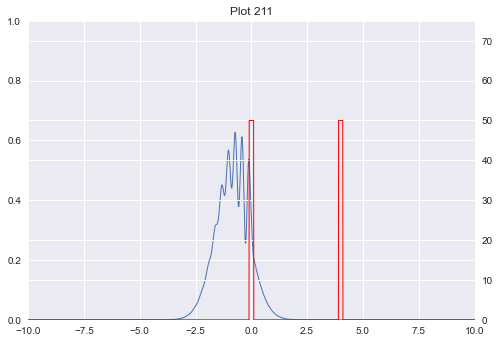

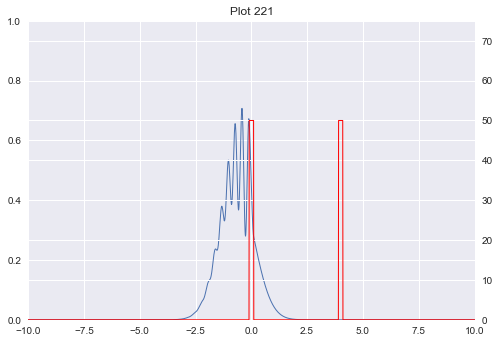

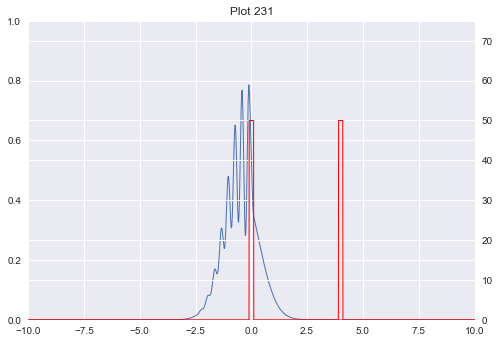

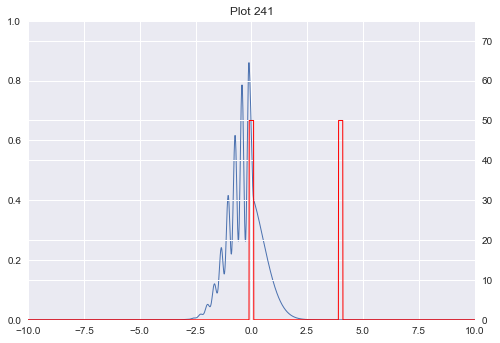

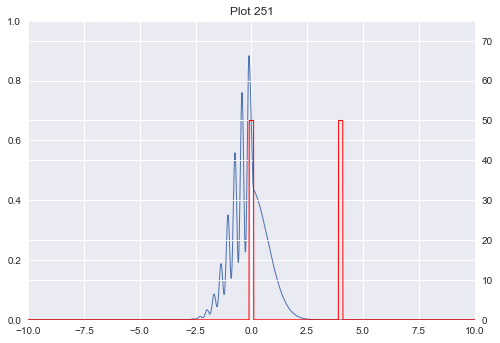

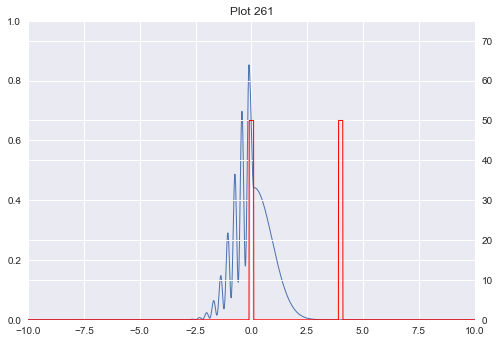

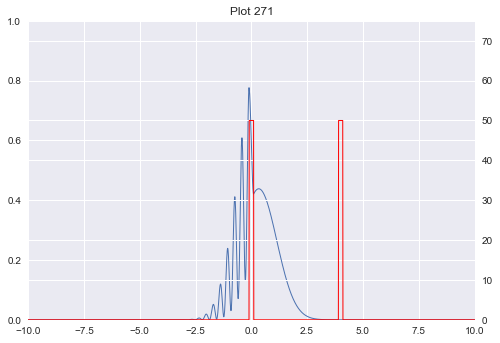

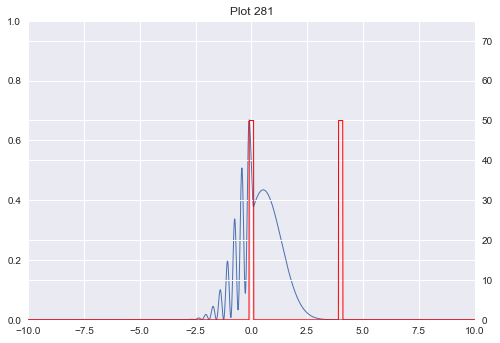

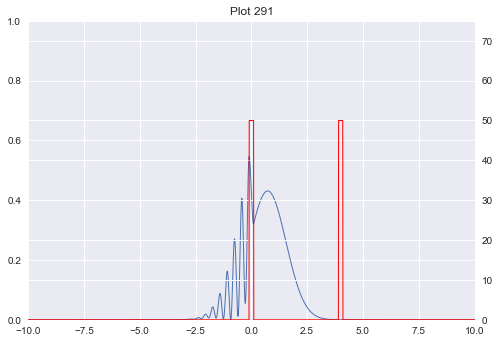

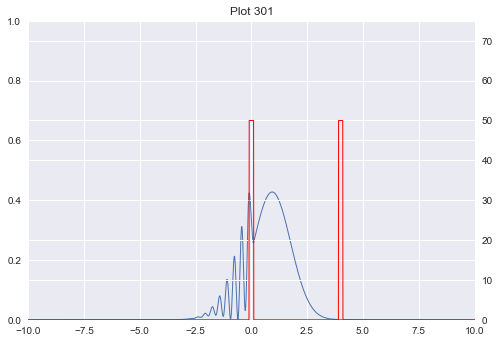

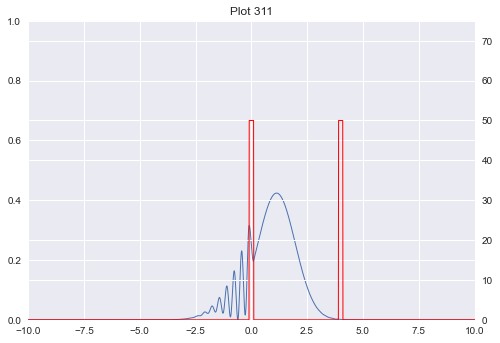

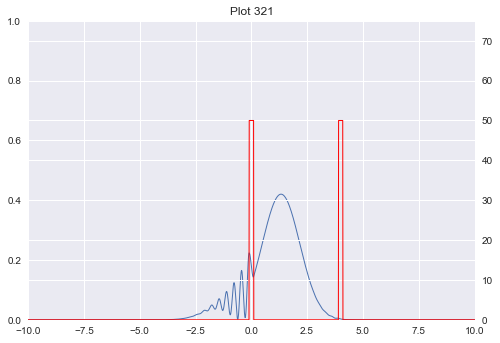

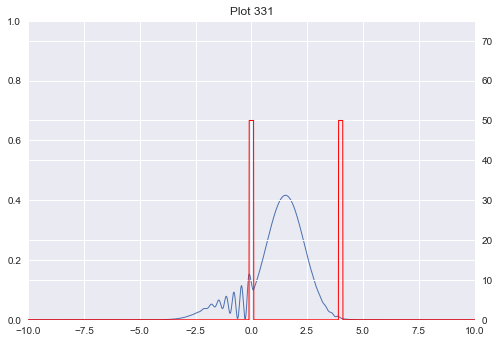

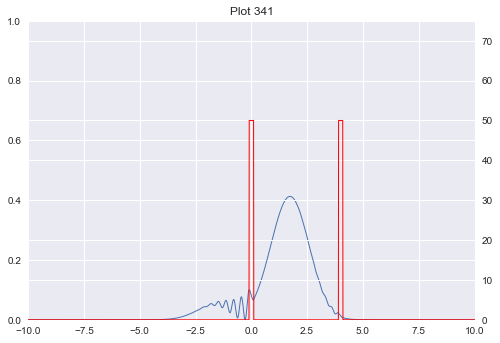

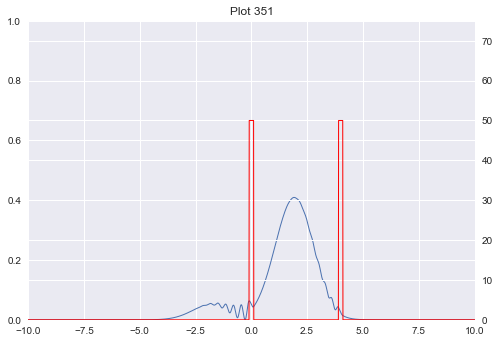

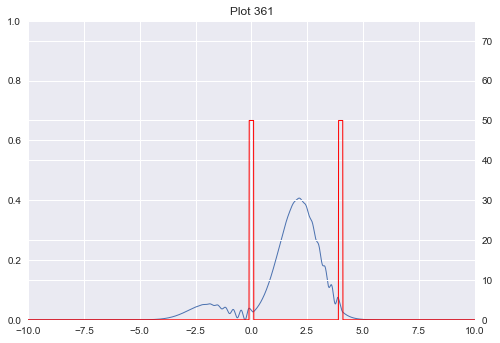

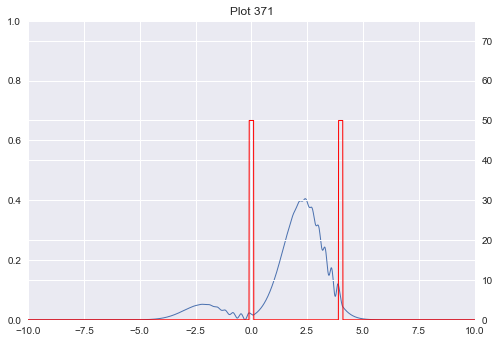

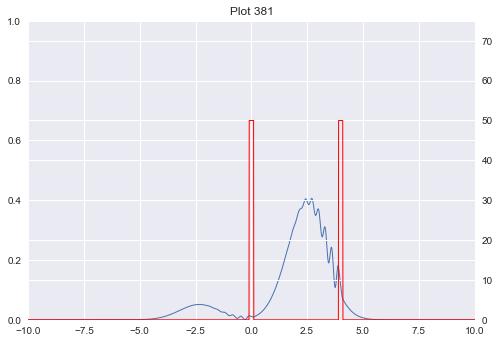

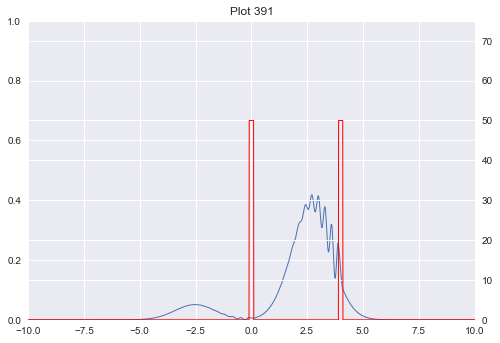

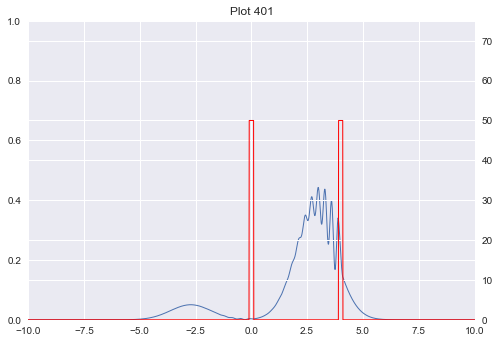

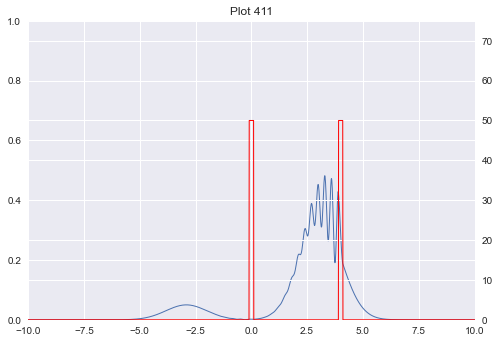

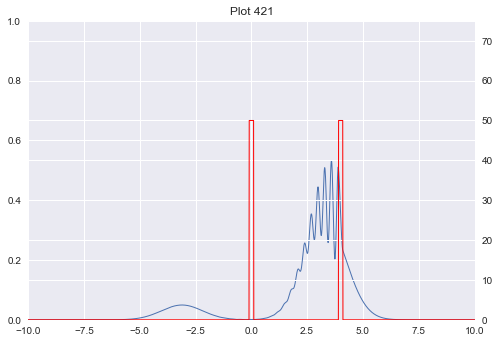

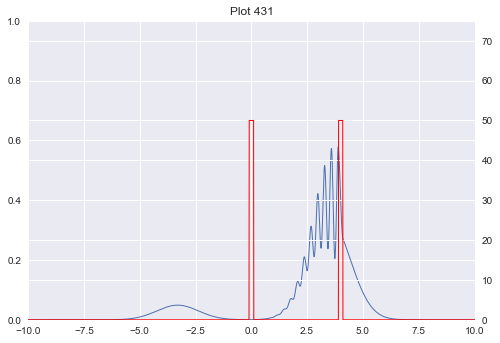

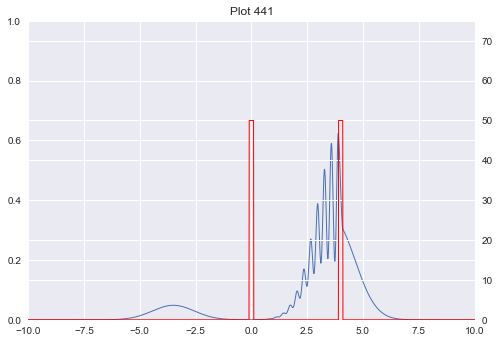

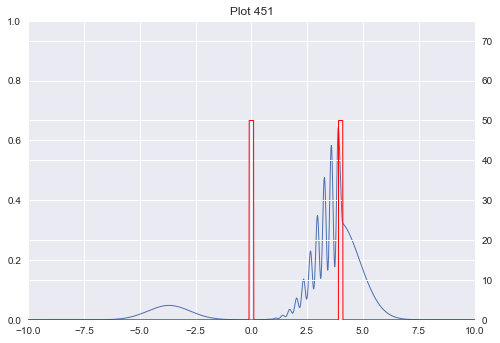

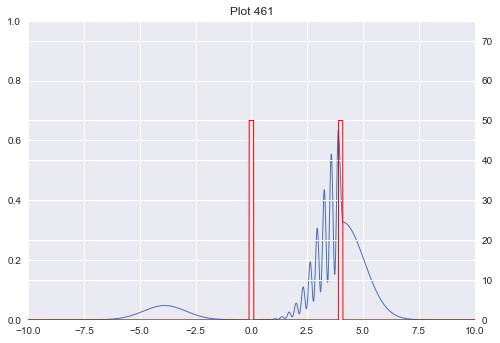

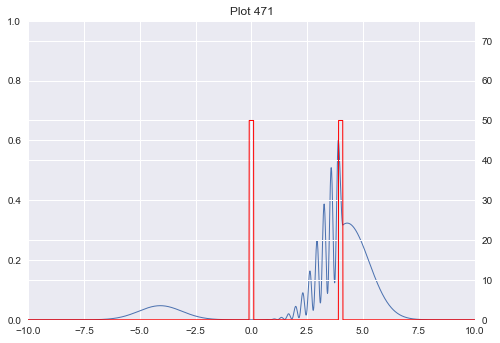

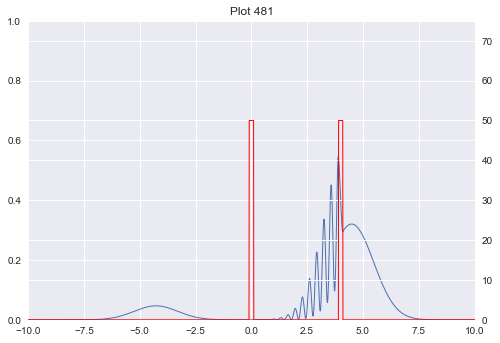

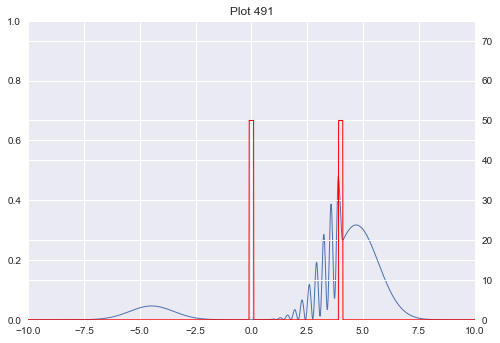

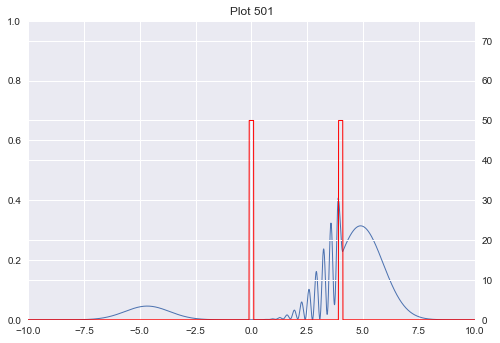

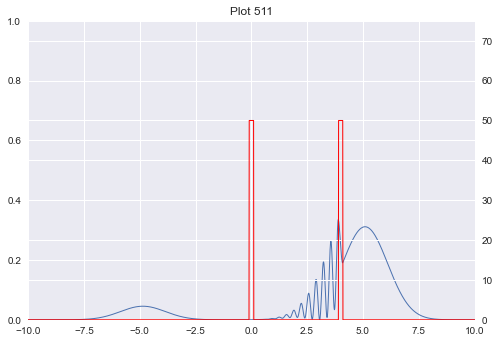

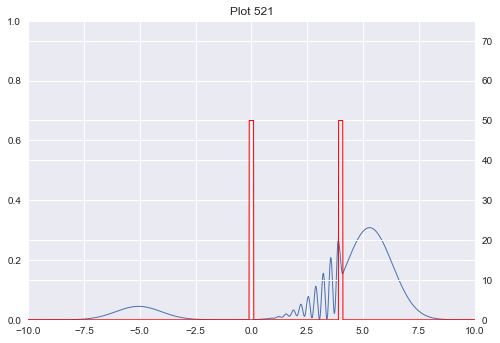

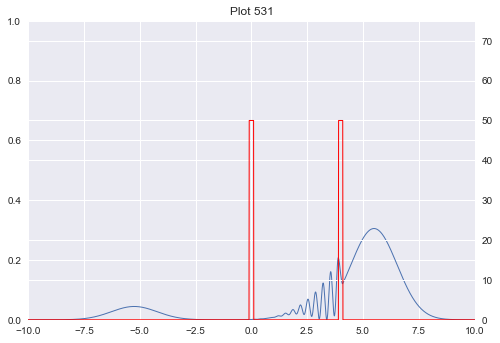

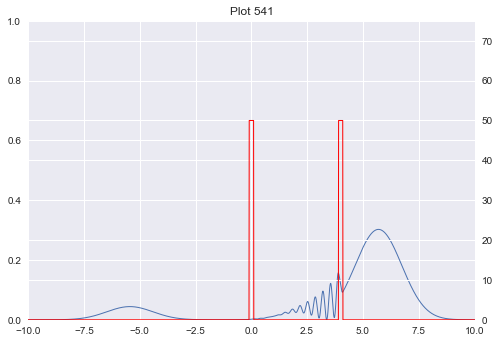

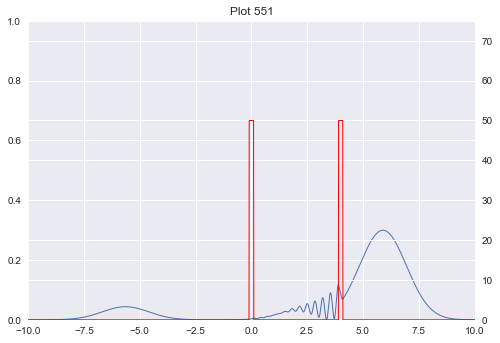

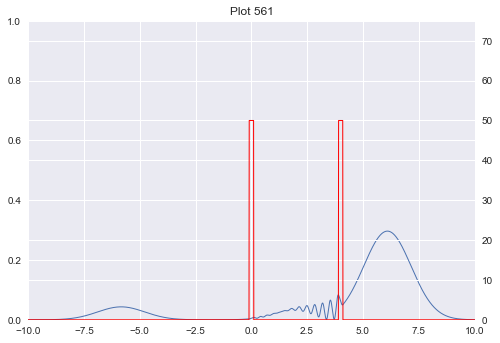

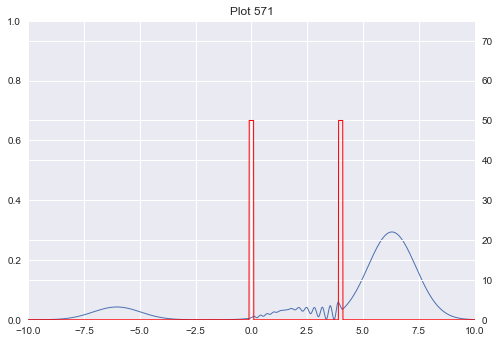

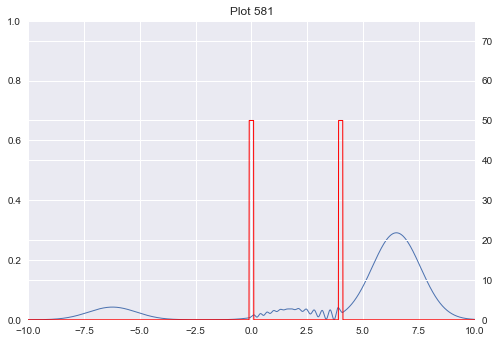

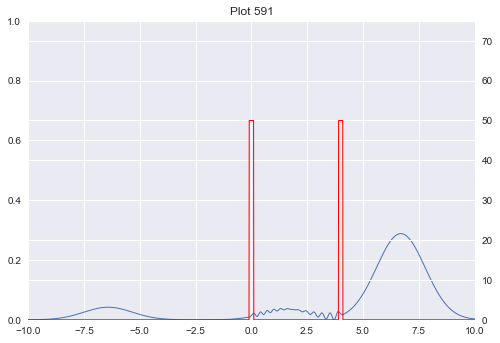

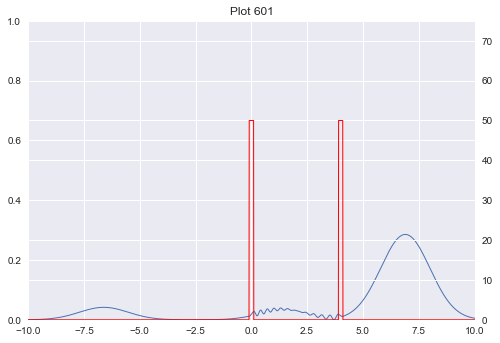

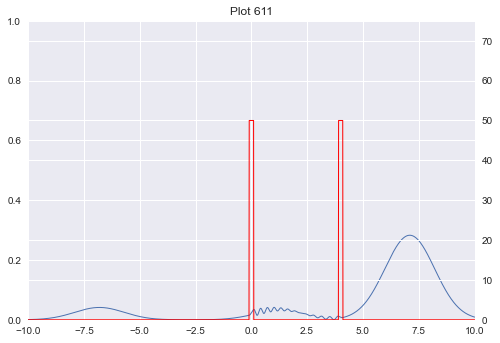

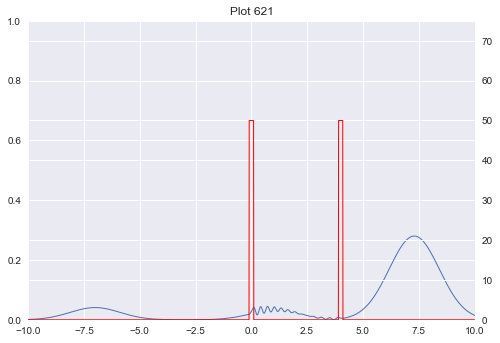

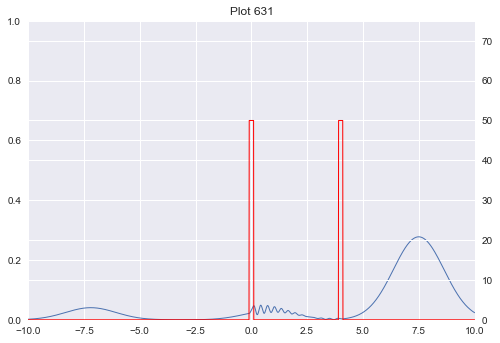

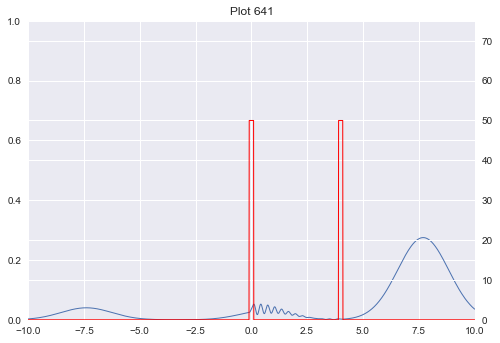

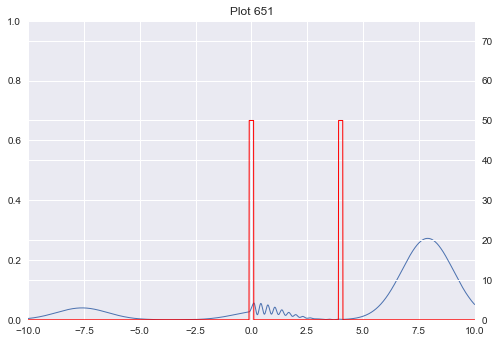

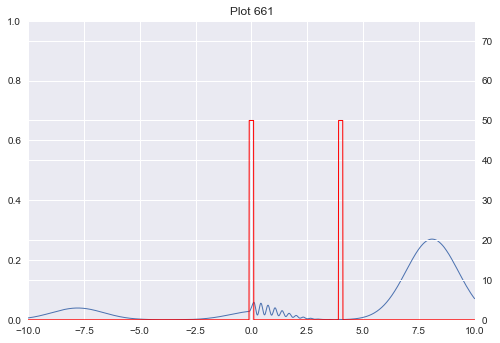

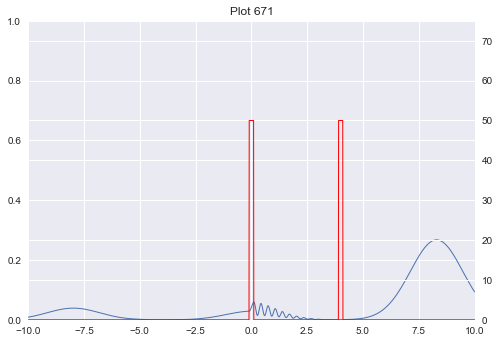

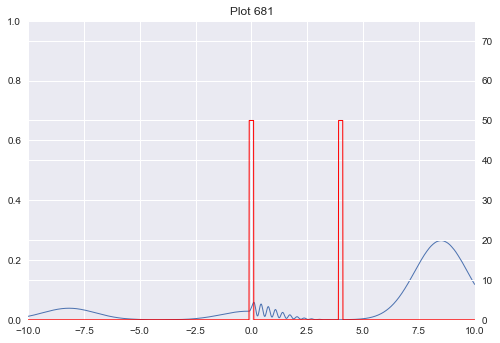

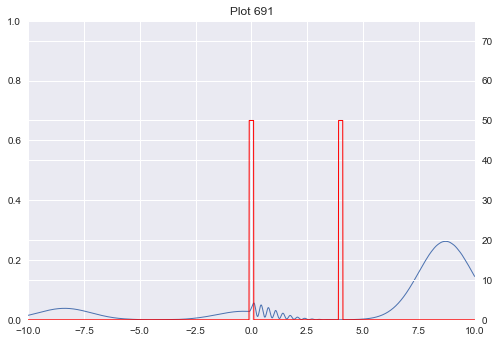

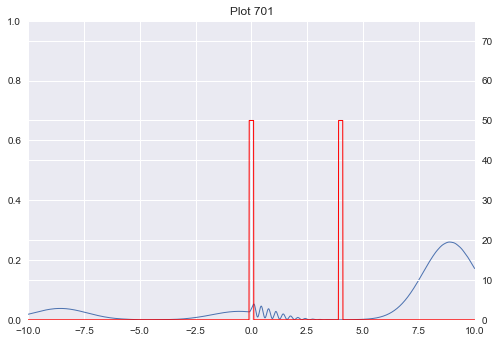

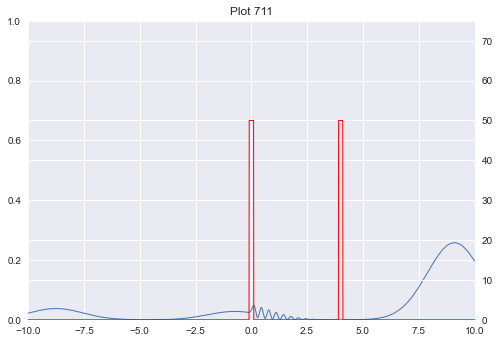

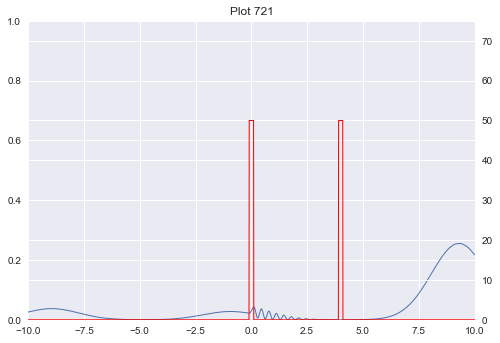

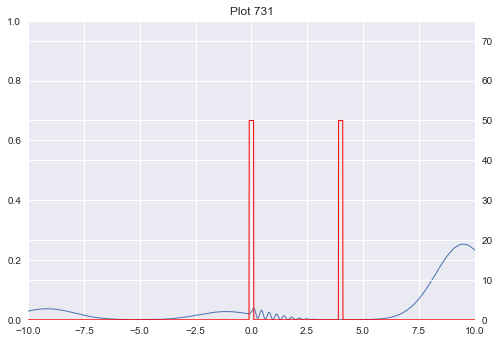

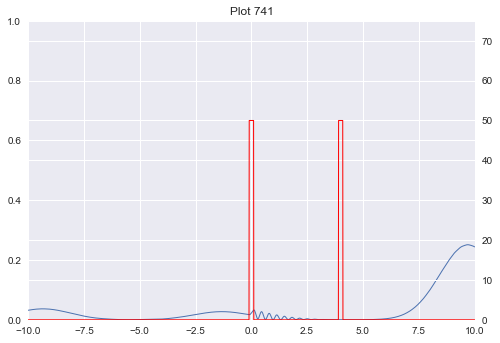

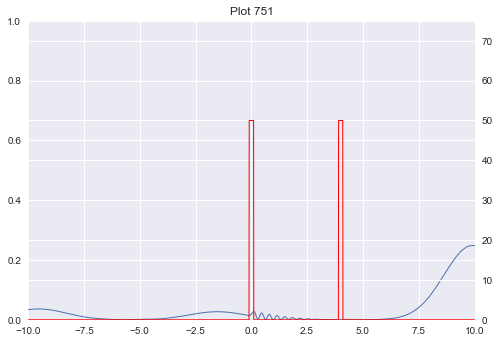

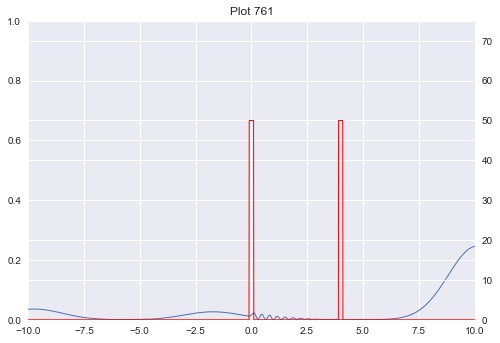

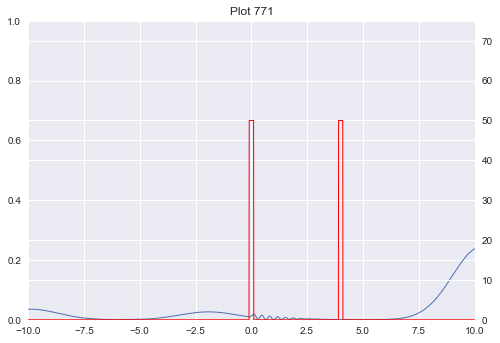

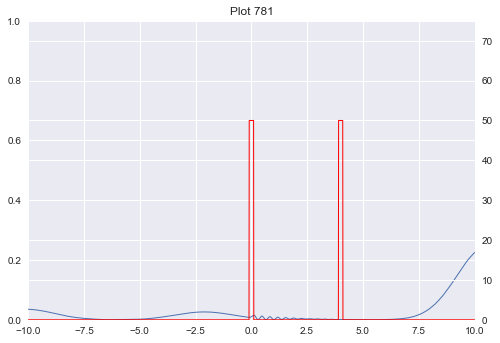

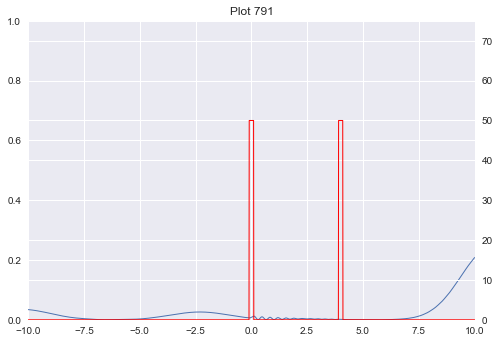

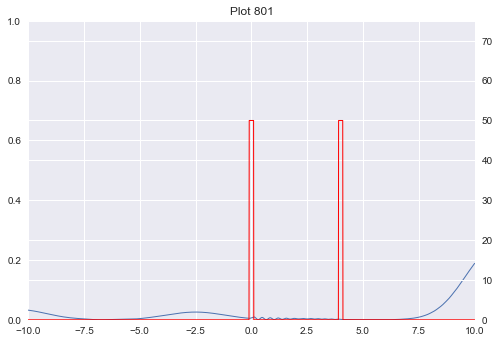

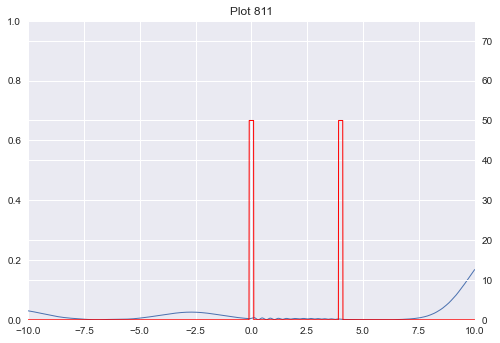

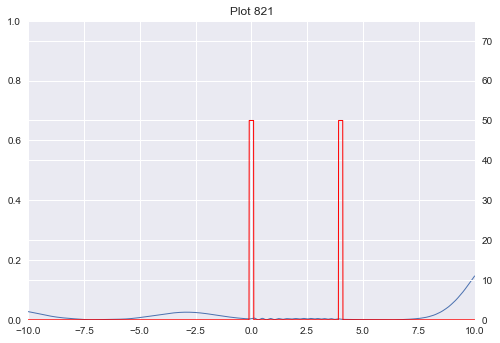

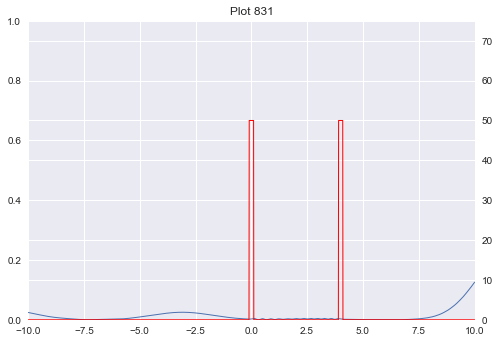

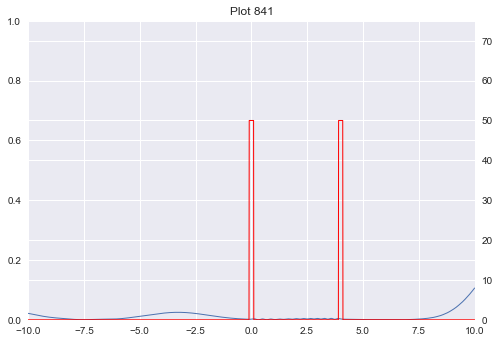

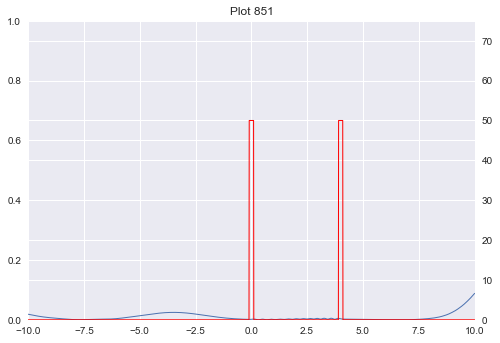

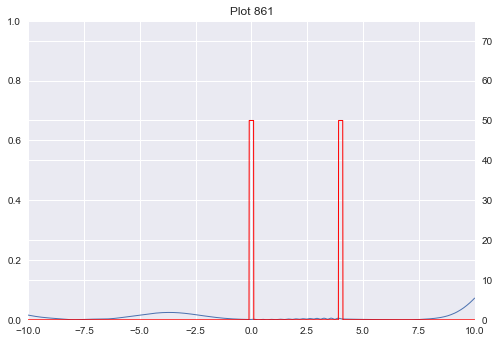

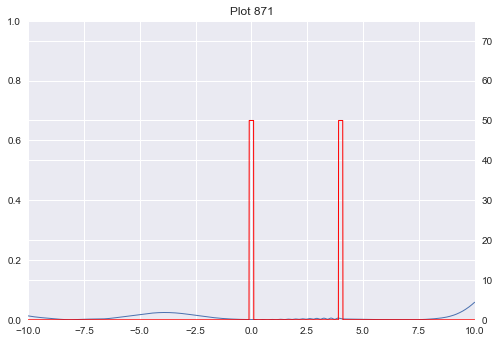

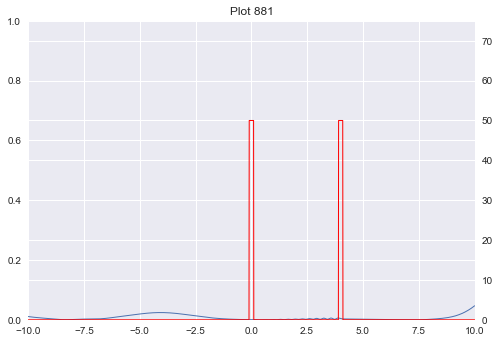

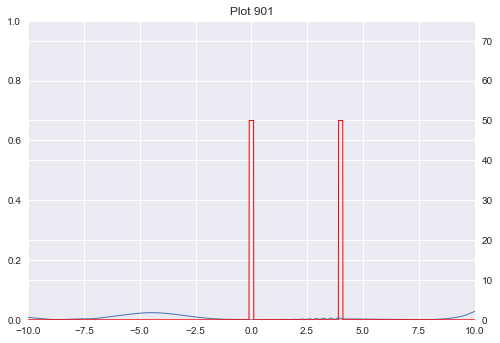

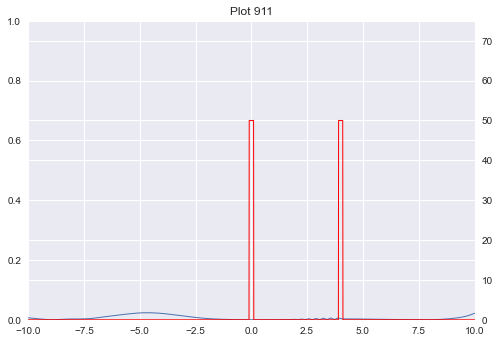

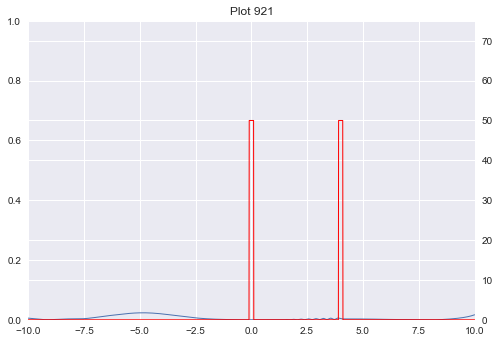

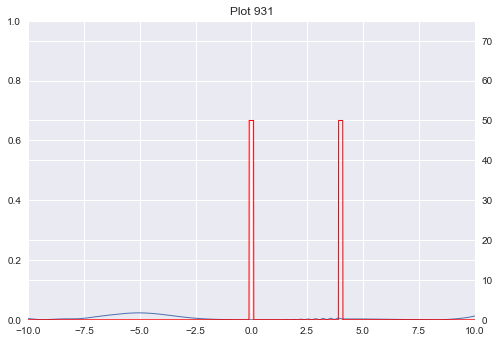

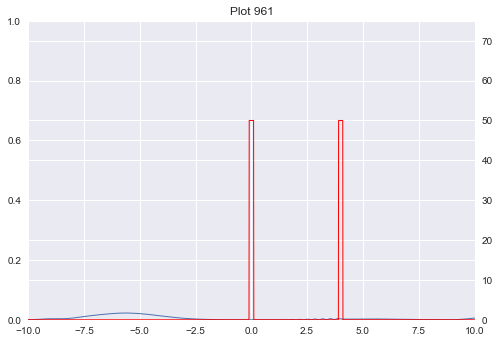

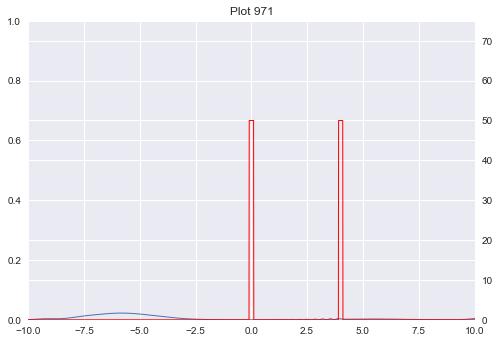

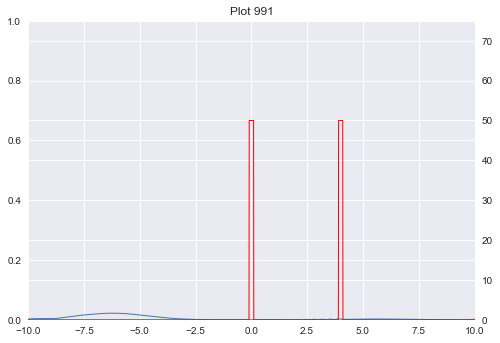

In [54]:
for i in range(0, 1000, 10):
    fig, (ax1) = plt.subplots(1, sharex=True, sharey=True)

    ax1t= ax1.twinx()
    ax1t.get_shared_y_axes().join(ax1t)
    ax1.set_ylim(0.,1.0)
    ax1.set_xlim(-10.,10.)
    ax1t.set_ylim(0.,1.5*V0)
    
    ax1.plot(x,abs(p3_psi[:,i])**2,lw=1.0)
    
    ax1t.plot(x,V,color='r',lw=1.0)
    ax1.set_title(f'Plot {i + 1}')
    plt.savefig(f'images/plot_{i + 1:03d}.png')

    plt.show()


In [55]:
import cv2
import os

if not os.path.exists('images'):
    os.makedirs('images')

In [56]:
img_array = []

for i in range(1000):
    filename = f'images/plot_{i + 1:03d}.png'
    img = cv2.imread(filename)
    img_array.append(img)
    
    
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('D:\\movie.mp4', fourcc, 10, img_array[0].shape[:2][::-1])
for i in range(len(img_array)):
    out.write(img_array[i])

# Release the video file
out.release()

In [35]:
#for lam, the double potential barrier

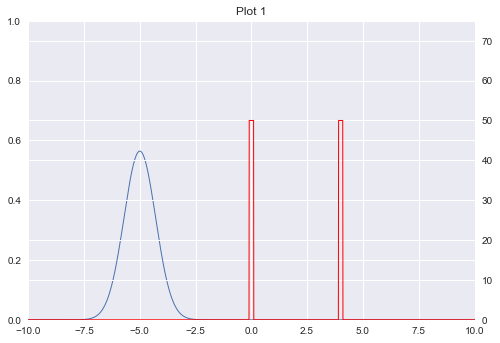

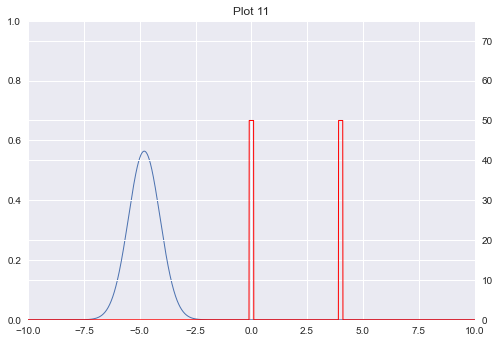

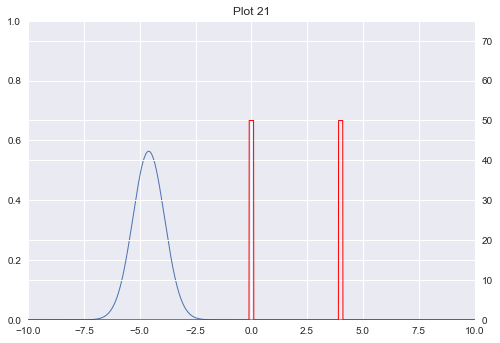

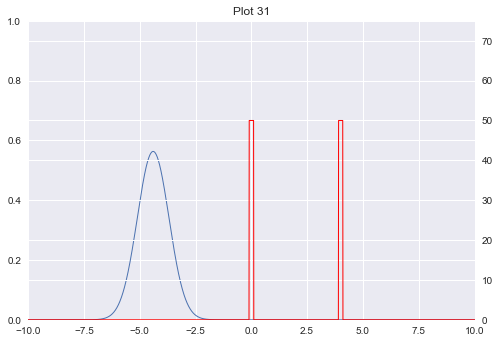

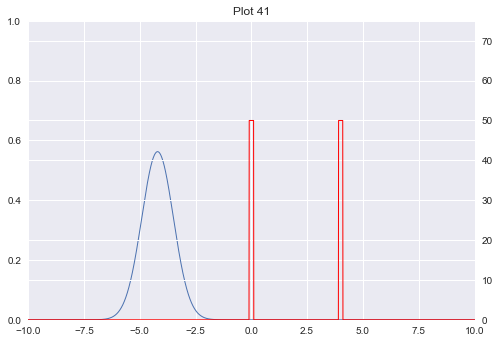

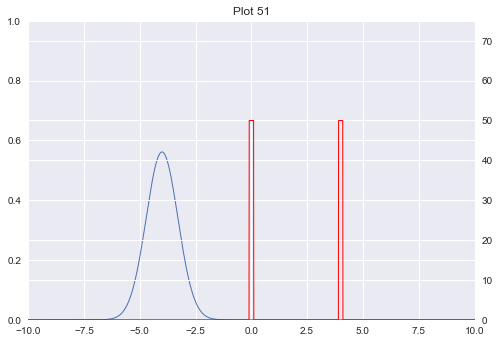

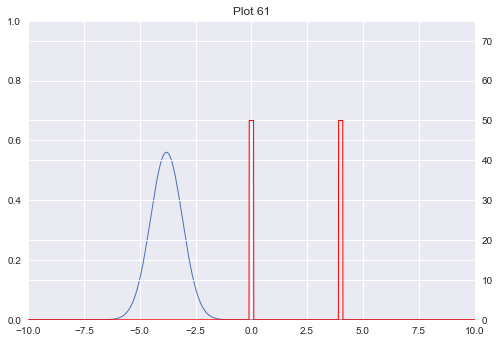

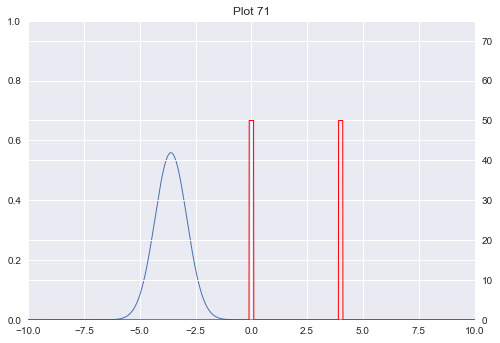

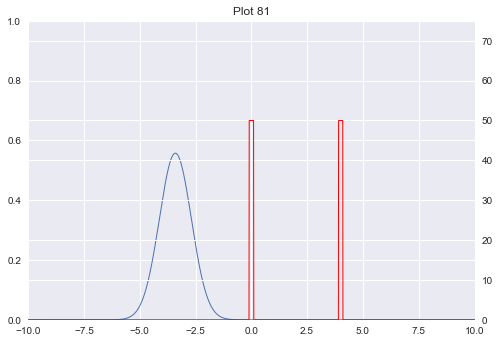

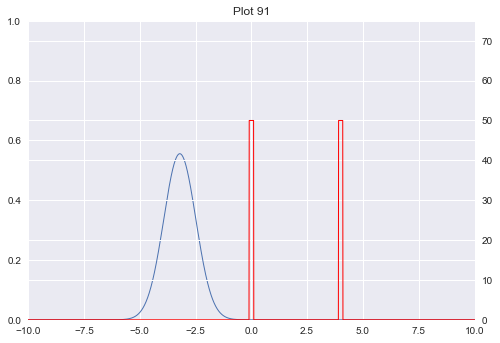

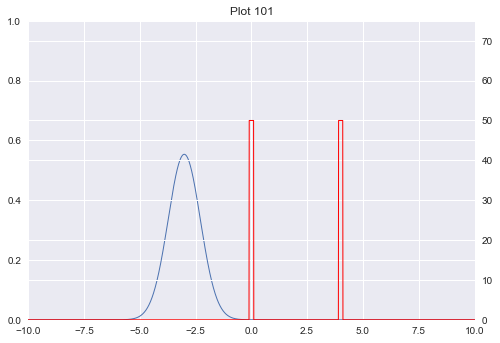

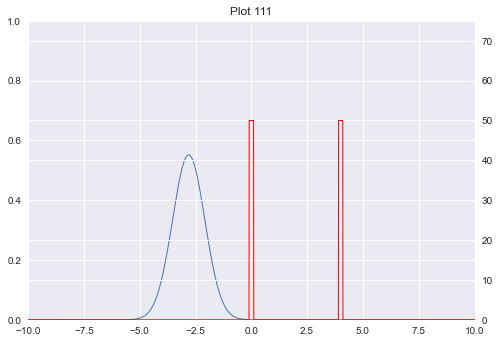

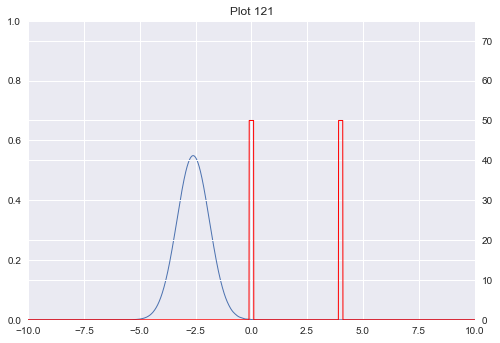

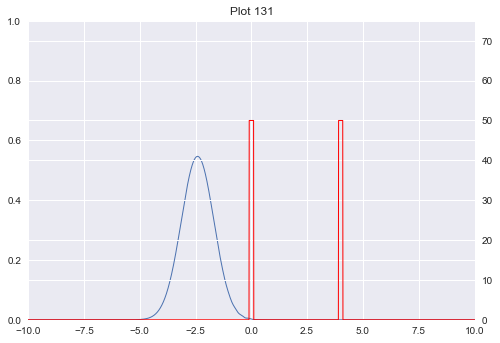

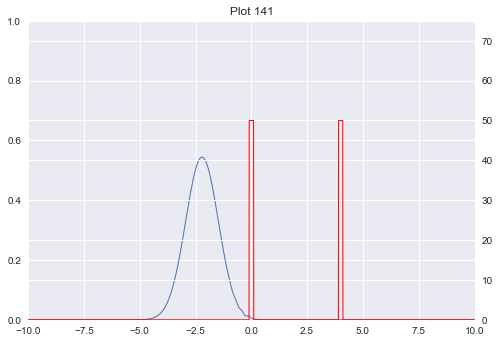

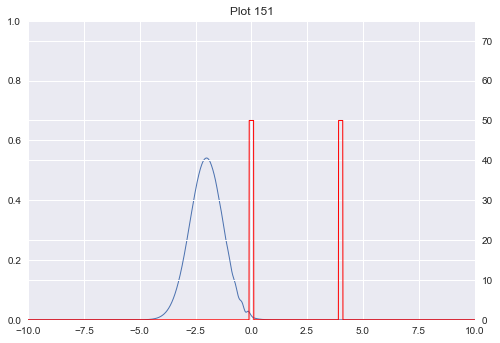

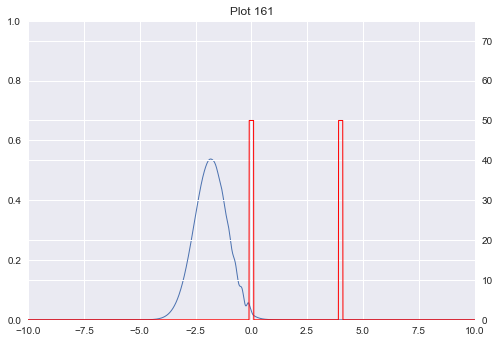

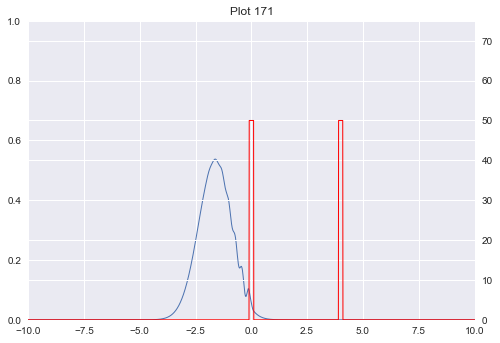

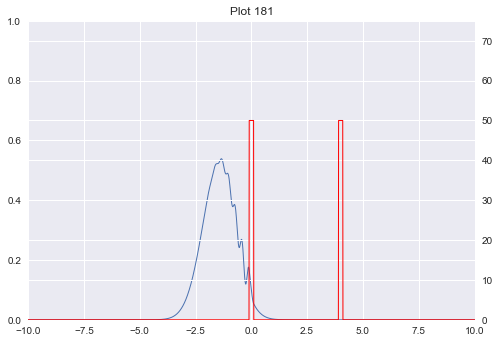

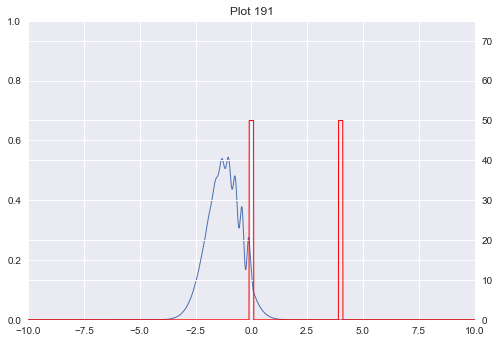

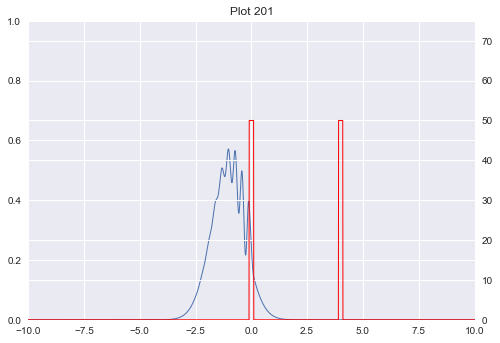

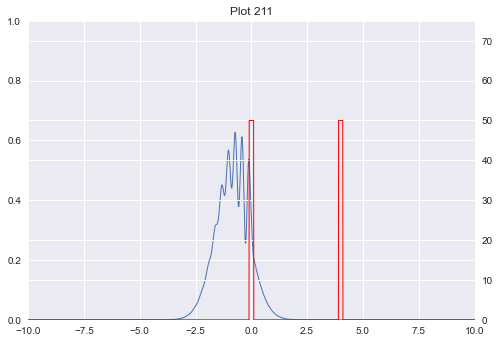

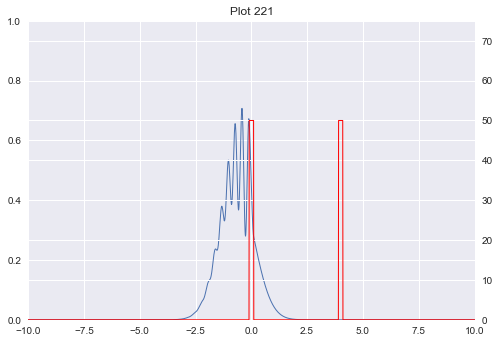

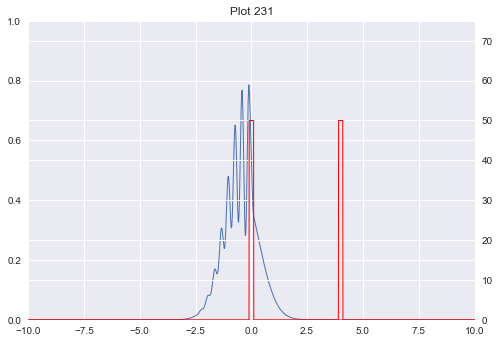

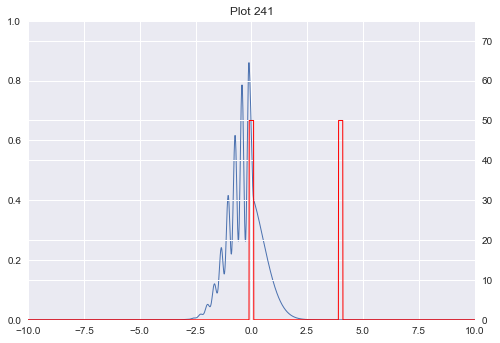

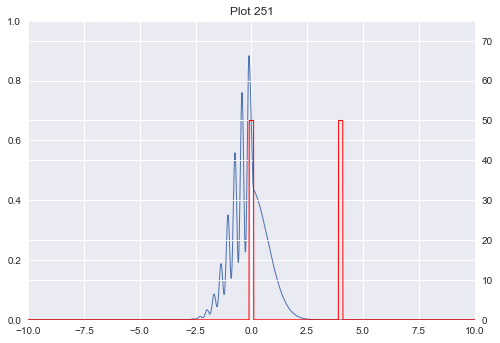

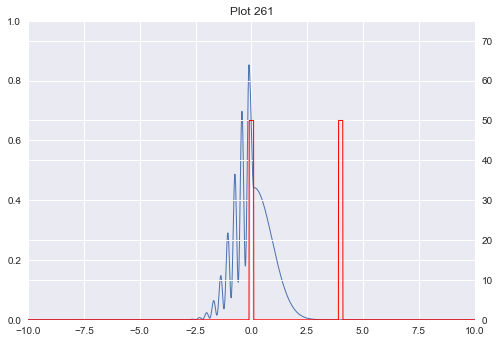

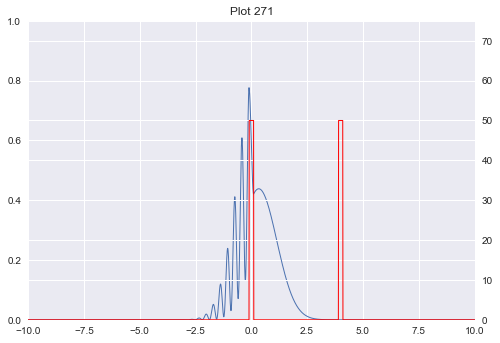

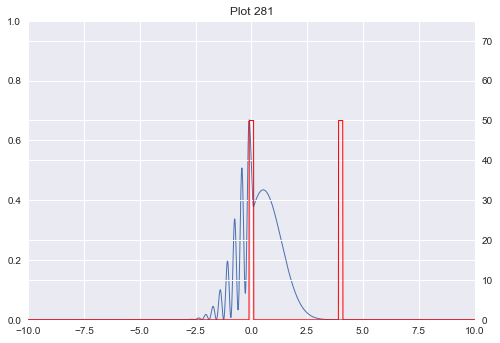

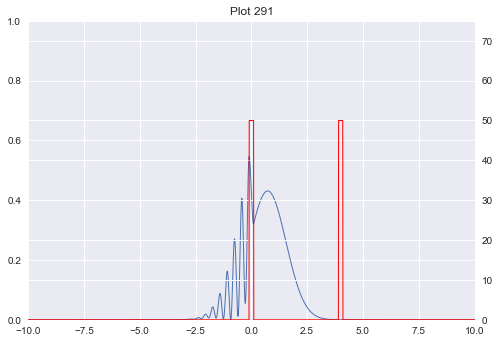

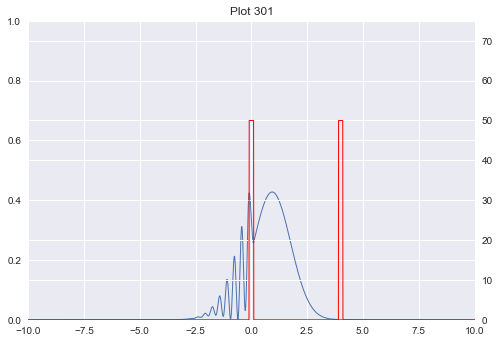

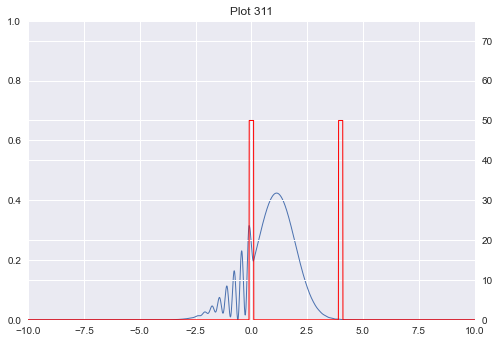

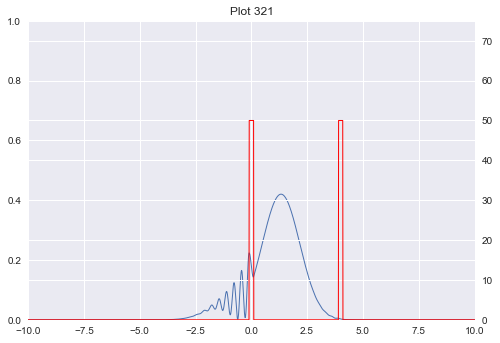

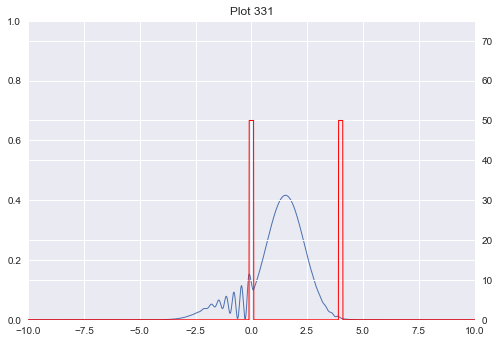

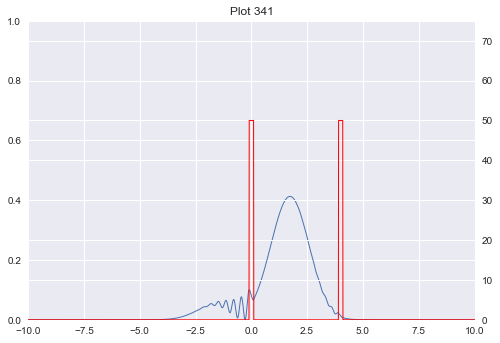

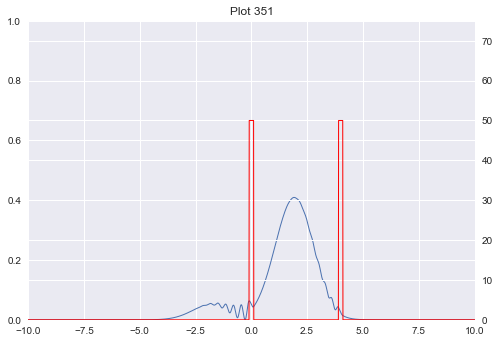

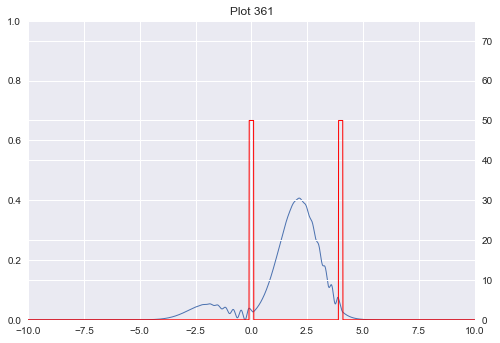

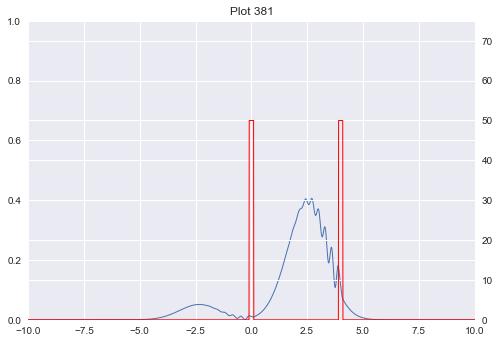

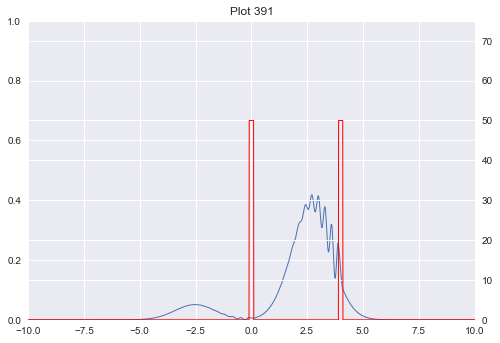

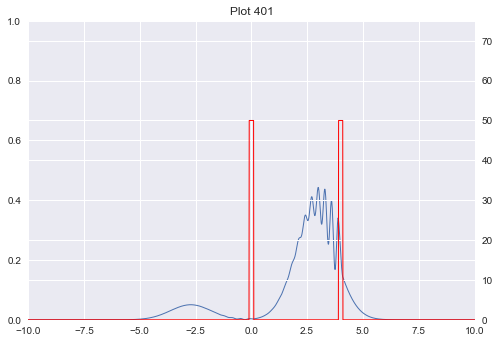

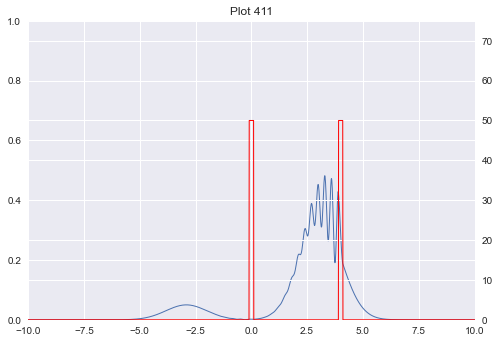

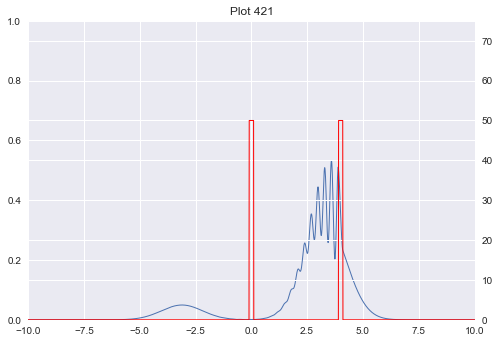

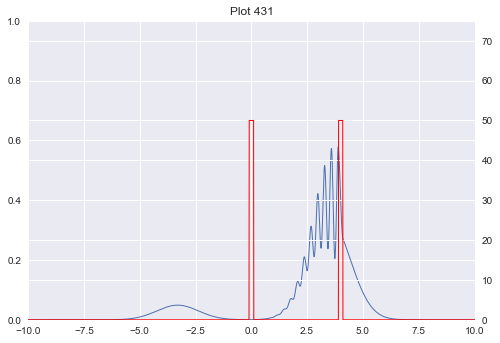

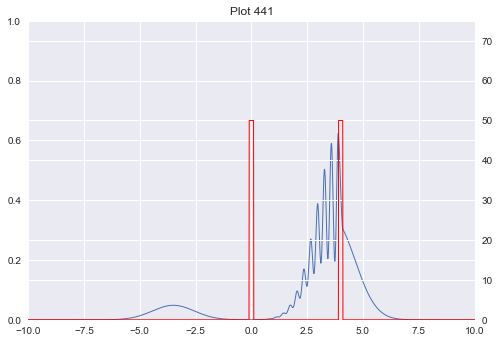

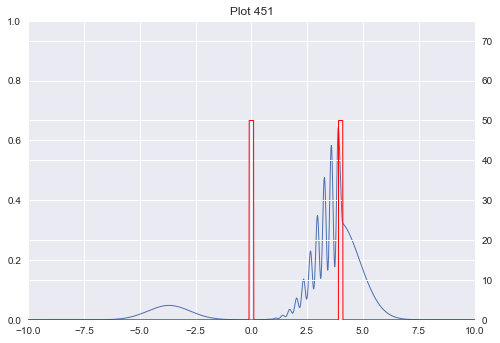

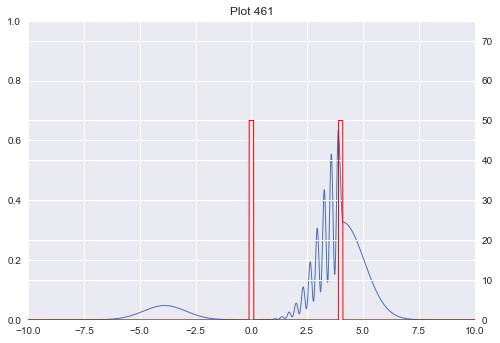

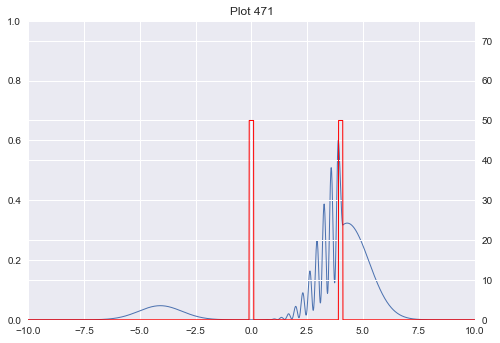

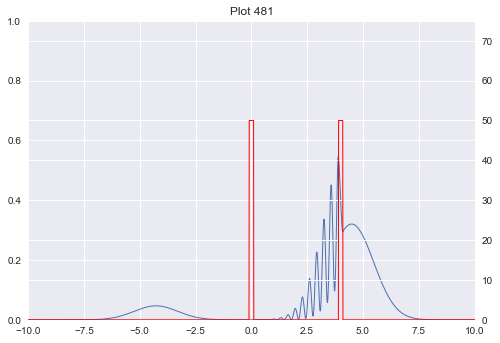

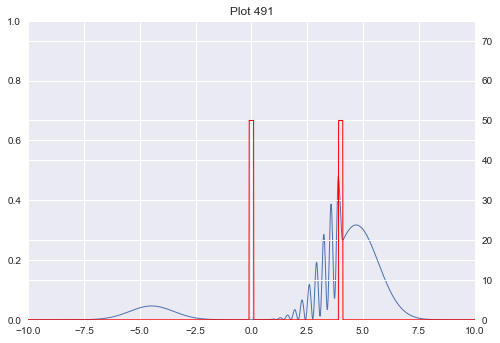

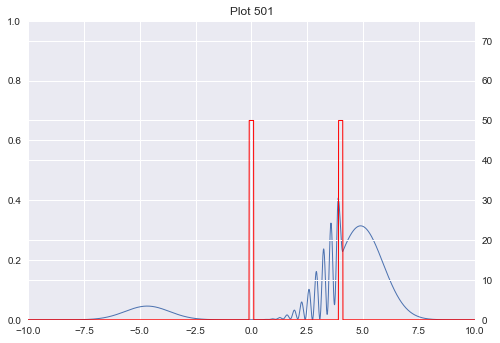

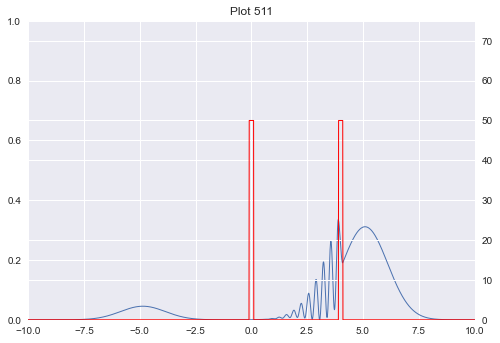

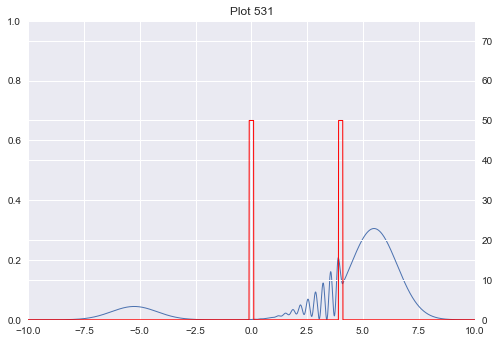

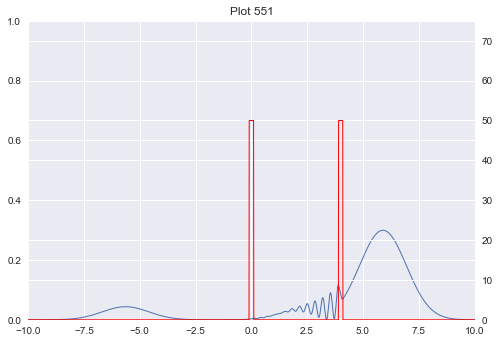

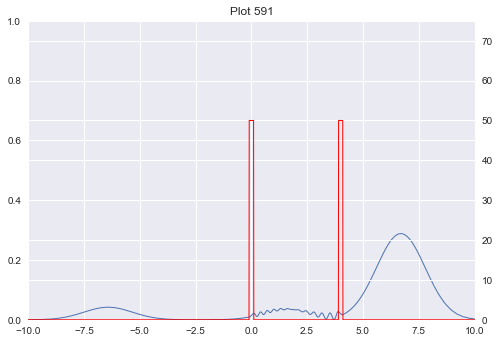

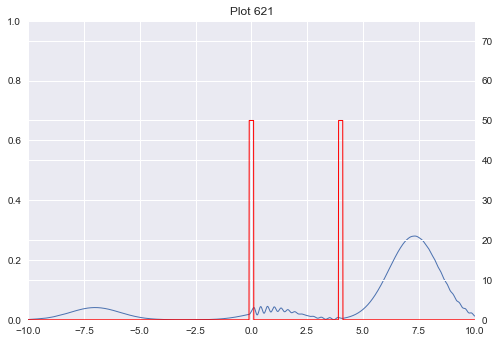

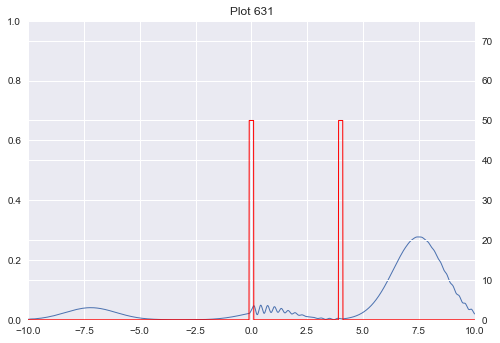

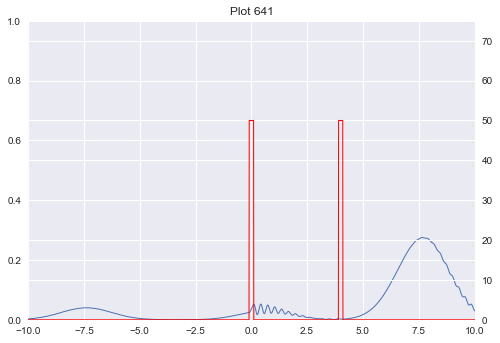

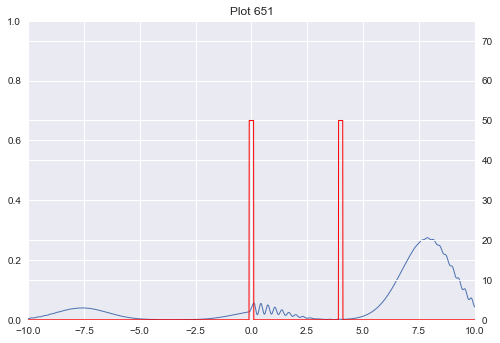

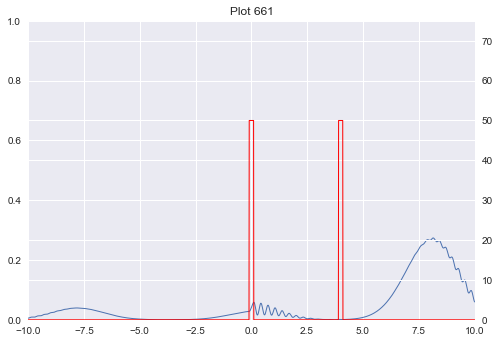

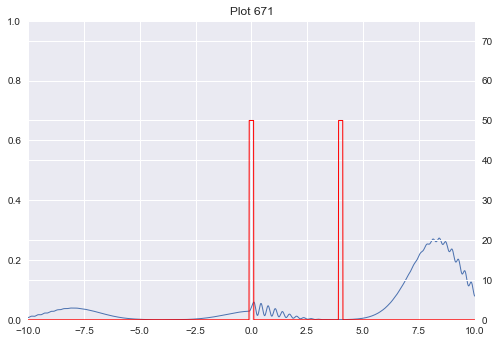

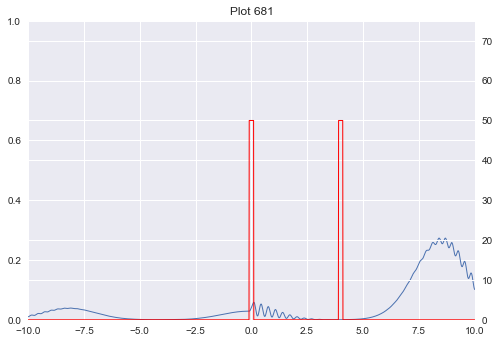

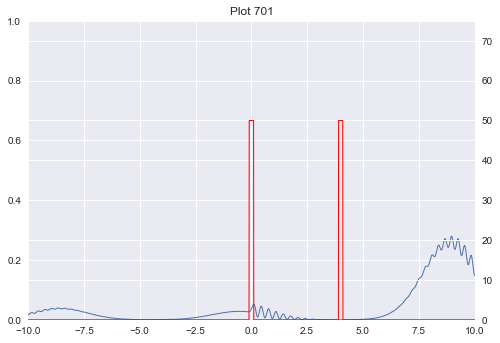

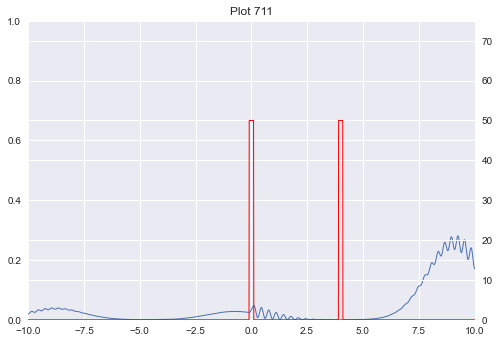

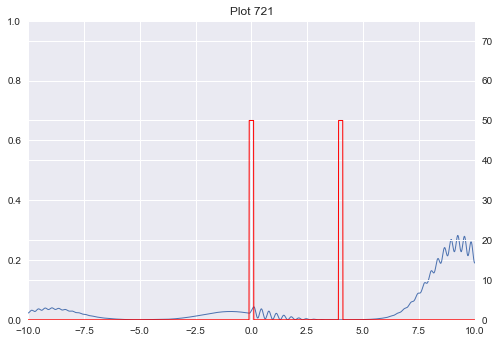

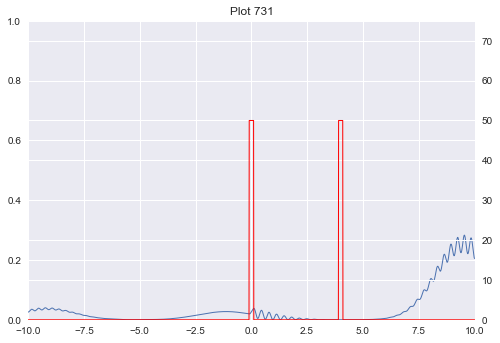

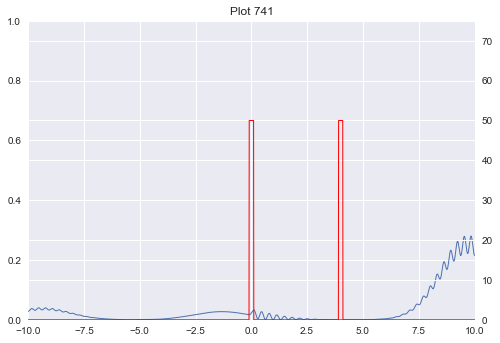

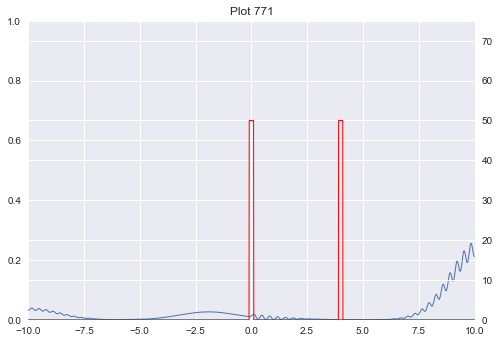

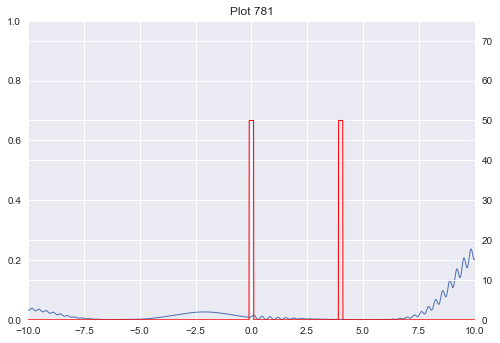

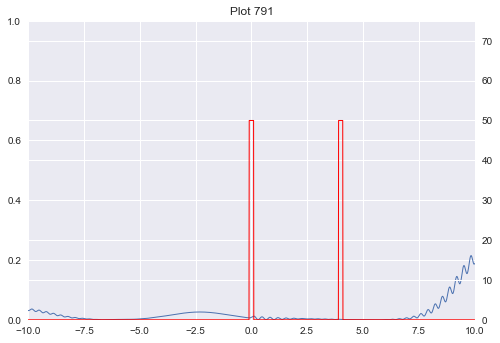

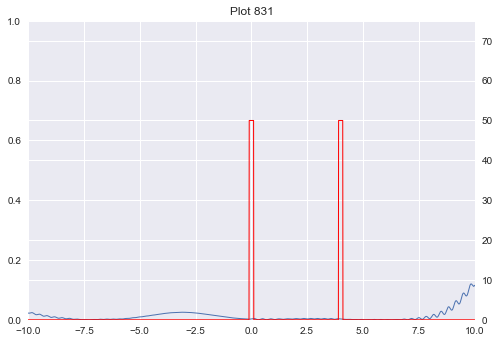

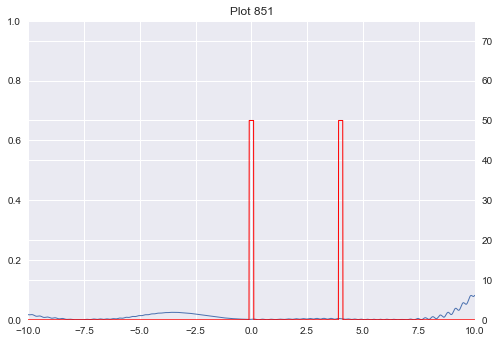

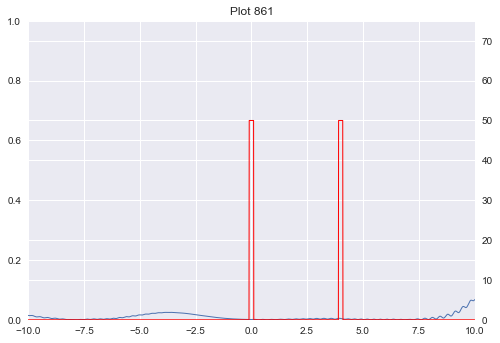

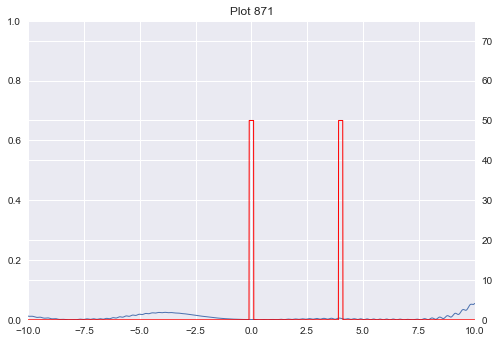

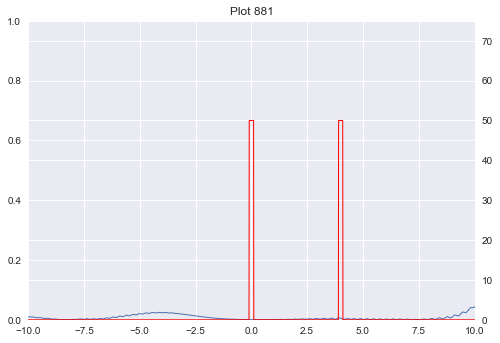

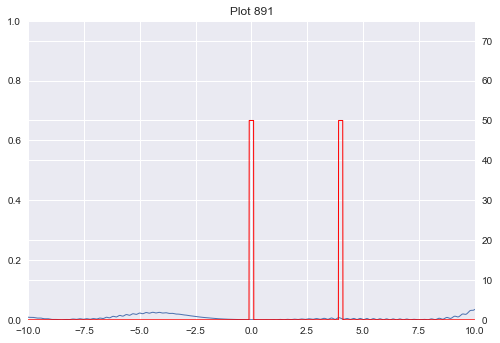

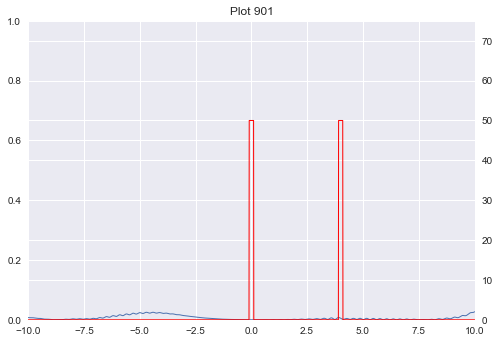

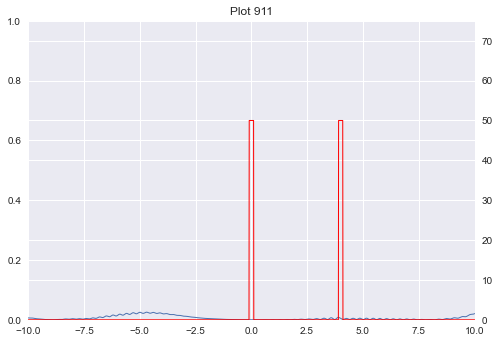

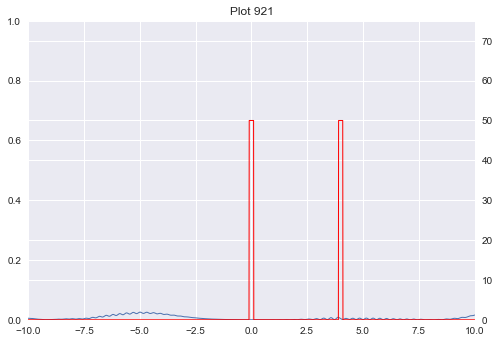

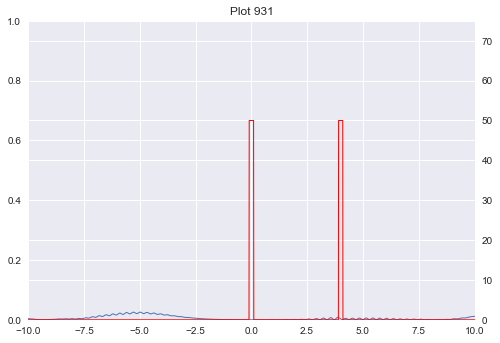

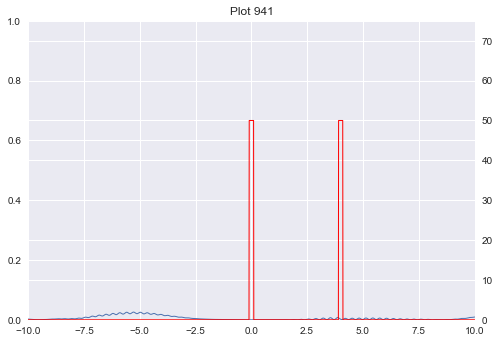

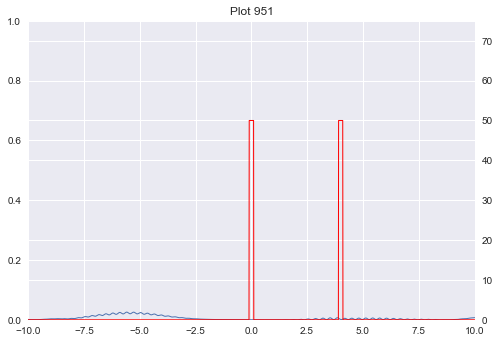

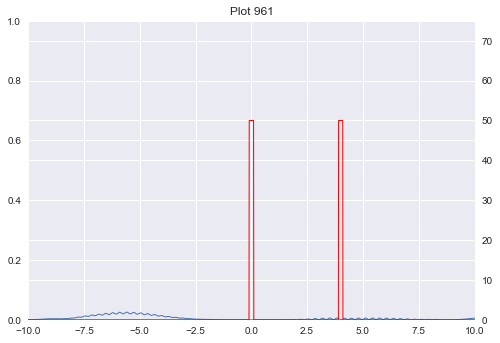

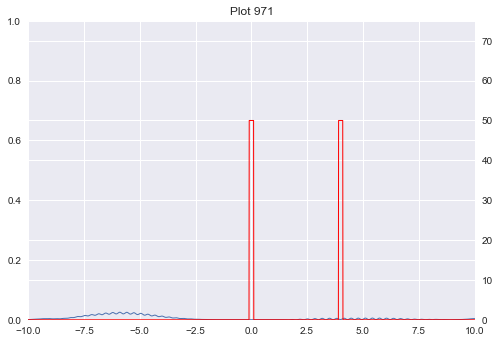

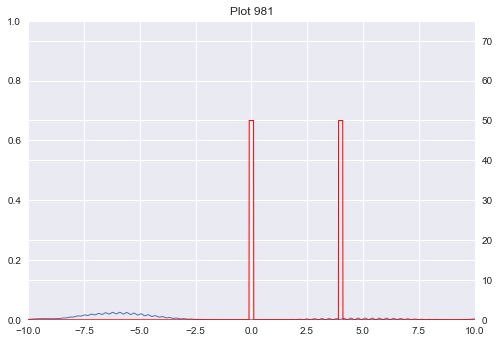

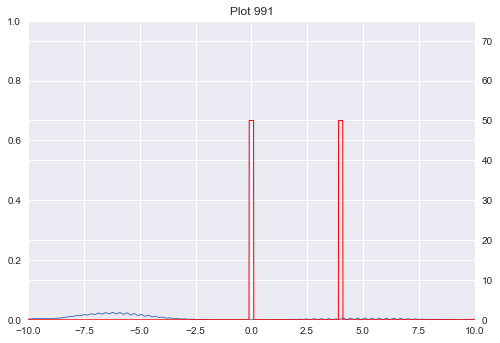

In [41]:
lam_zeta = LAM_ABC(g1, g2, V[0:2048],dt,dx,m, k0)
lam_U1, LAM_U2 = CN_LAM(J, V[0:2048], lam_zeta, dx, dt, m)
lam_psi = LAM_CN_Solve(g1, g2, x, dx, t, dt, psi0, V, m, k0)

for i in range(0, 1000, 10):
    fig, (ax1) = plt.subplots(1, sharex=True, sharey=True)

    ax1t= ax1.twinx()
    ax1t.get_shared_y_axes().join(ax1t)
    ax1.set_ylim(0.,1.0)
    ax1.set_xlim(-10.,10.)
    ax1t.set_ylim(0.,1.5*V0)
    
    

    ax1.plot(x,abs(lam_psi[:,i])**2,lw=1.0)
    
    ax1t.plot(x,V,color='r',lw=1.0)
    ax1.set_title(f'Plot {i + 1}')
    plt.savefig(f'images/plot_{i + 1:03d}.png')

    plt.show()
    plt.close()


In [42]:
#Code for the video


import cv2
import os

if not os.path.exists('images'):
    os.makedirs('images')

In [44]:
img_array = []

for i in range(1000):
    filename = f'images/plot_{i + 1:03d}.png'
    img = cv2.imread(filename)
    img_array.append(img)
    
    
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('D:\\movie.mp4', fourcc, 10, img_array[0].shape[:2][::-1])
for i in range(len(img_array)):
    out.write(img_array[i])

# Release the video file
out.release()

# Thank You